In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")


from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale

from scipy.stats import randint
from scipy.stats import skew


from keras.layers import Dense
from keras.models import Sequential

import xgboost as xgb

import math as math

import seaborn as sns

import h2o
from h2o.automl import H2OAutoML

Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
def extract():
    train_object = []
    train_int = []
    for n in range(0,train.shape[1]):
    
        if train[(train.columns[n])].dtype == "O":
            train_object.append(train[(train.columns[n])])
            #print(pd.DataFrame(train_object))
        elif train[train.columns[n]].dtype != "O":
            train_int.append(train[train.columns[n]])
            #print(pd.DataFrame(train_int))
        else:
            pass
        
        
        extract.train_object = (pd.DataFrame(train_object)).T
        extract.train_int = (pd.DataFrame(train_int)).T

In [5]:
extract()

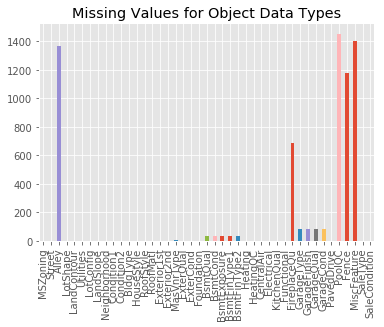

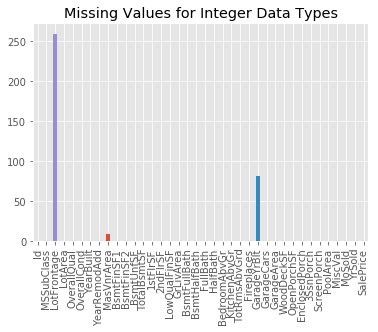

In [6]:
#plt.subplot(2,1,1)

extract.train_object.isnull().sum().plot.bar()
plt.title("Missing Values for Object Data Types")
plt.show()
#plt.subplot(2,1,2)
extract.train_int.isnull().sum().plot.bar()
plt.title("Missing Values for Integer Data Types")
plt.show()

In [7]:
# train.select_dtypes(include = ["object"])

In [8]:
remodeled = pd.DataFrame({"No":(train.YearBuilt == train.YearRemodAdd).sum() , "Yes":(train.YearBuilt != train.YearRemodAdd).sum()}, index = [0])

In [9]:
(train.YearBuilt == train.YearRemodAdd).sum()
#this is a new house so it is NOT remodeled

764

In [10]:
(train.YearBuilt != train.YearRemodAdd).sum()

#this is an old house so it is remodeled

696

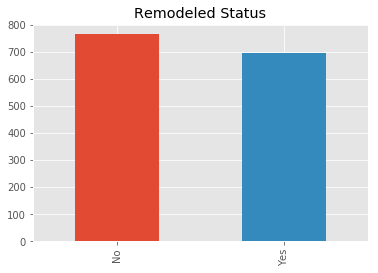

In [11]:
remodeled.unstack().plot.bar()
plt.xticks([0,1],["No" , "Yes"])
plt.title("Remodeled Status")
plt.show()

In [12]:
train.duplicated().sum()

#duplicated shows us if there are any duplicated rows in the data frame

0

In [13]:
train_cat = extract.train_object.apply(pd.Categorical)
train_num = extract.train_int

In [14]:
def plot(x):
    
    train_cat[x].value_counts().plot.bar()
    plt.title(train_cat[x].astype(str).name)
    plt.show()
    return ""

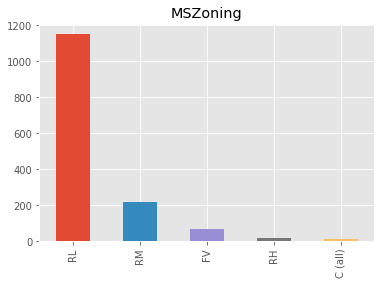

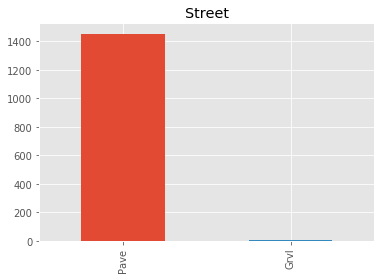

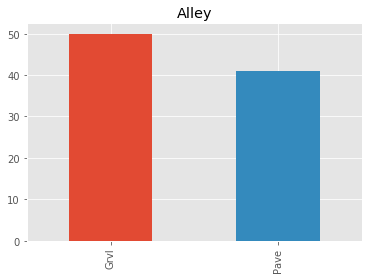

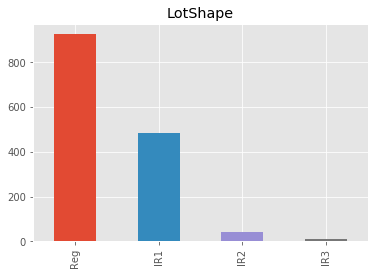

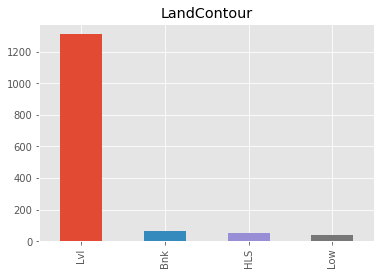

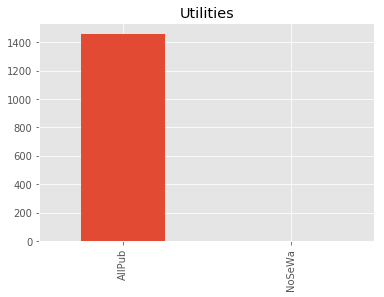

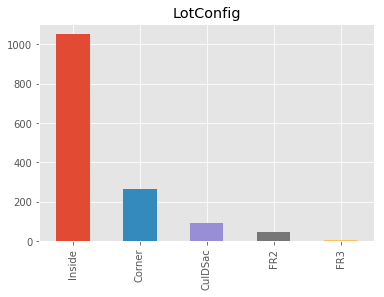

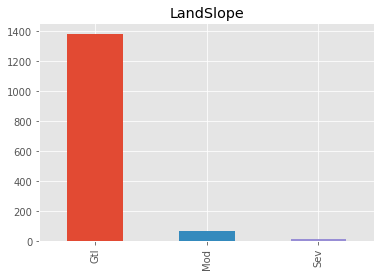

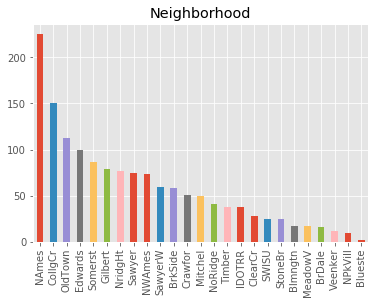

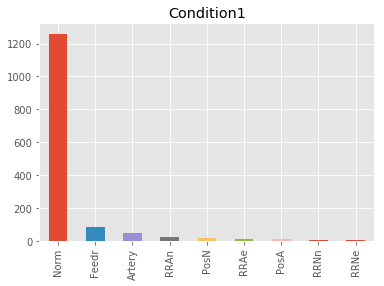

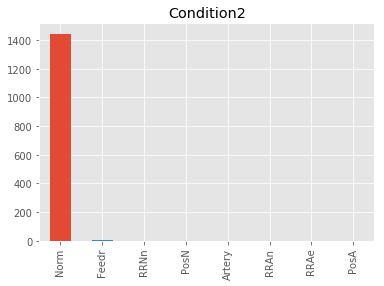

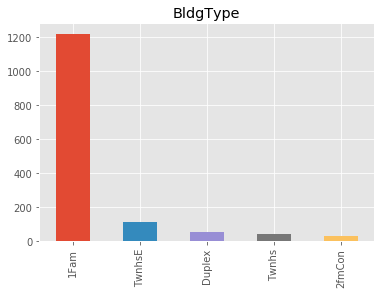

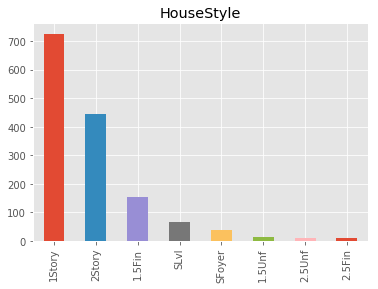

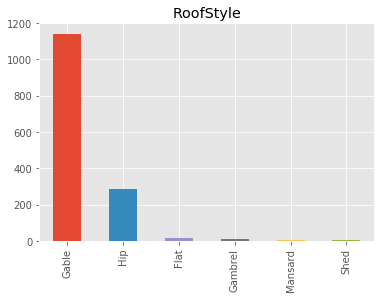

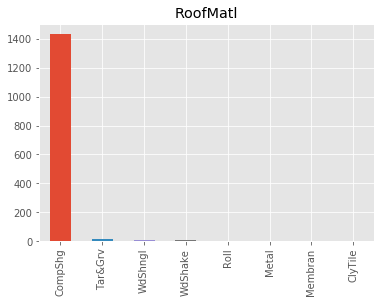

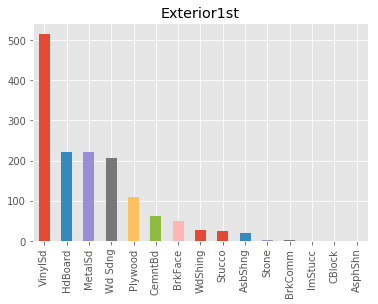

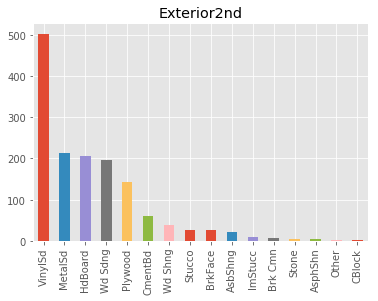

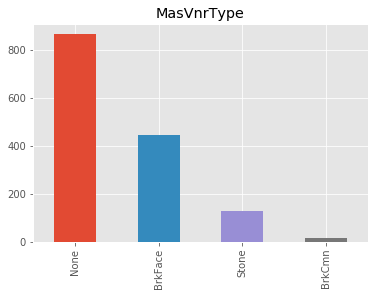

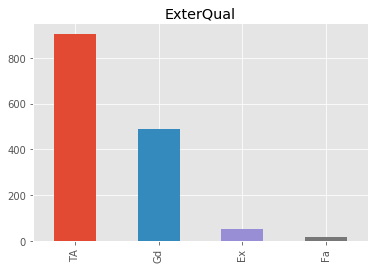

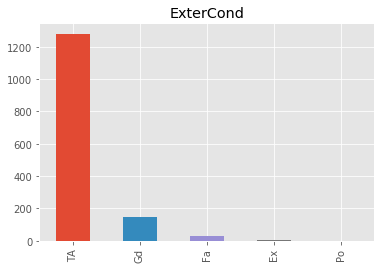

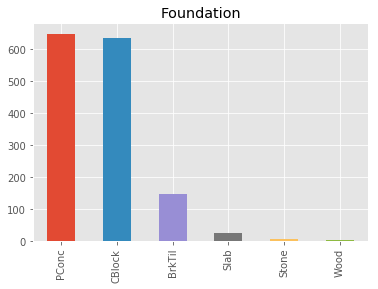

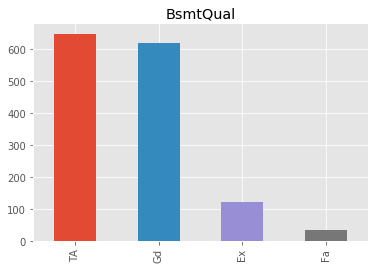

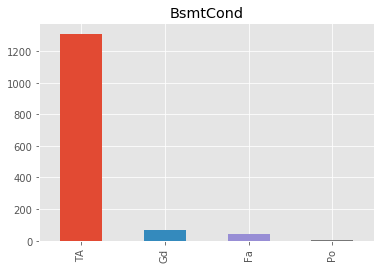

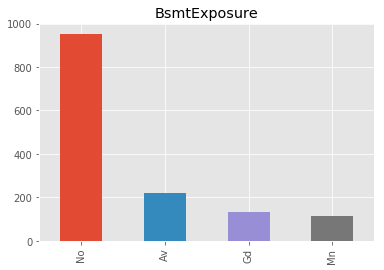

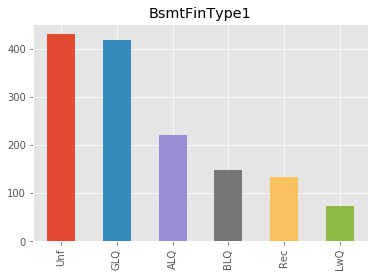

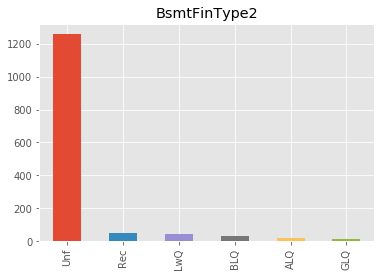

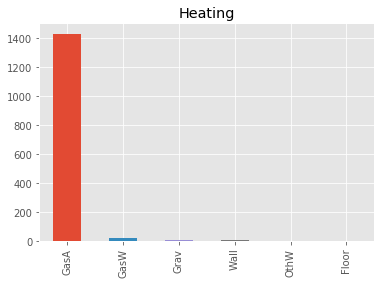

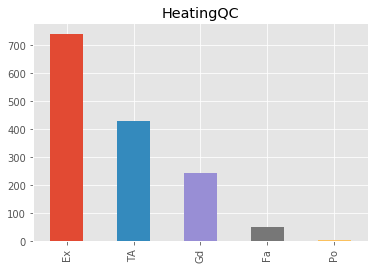

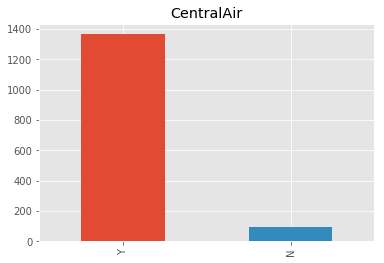

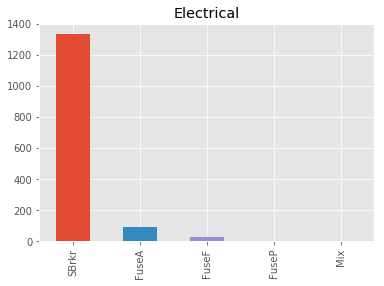

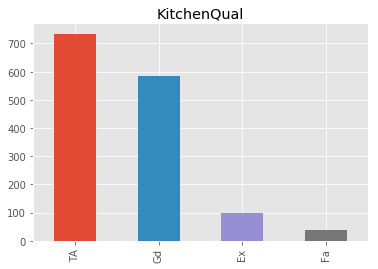

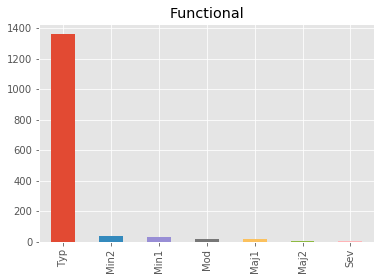

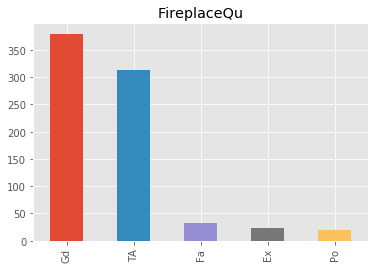

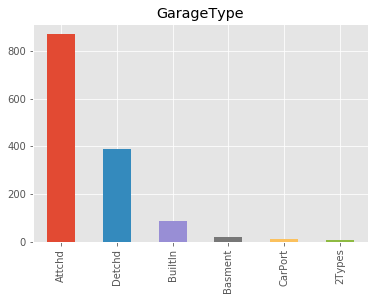

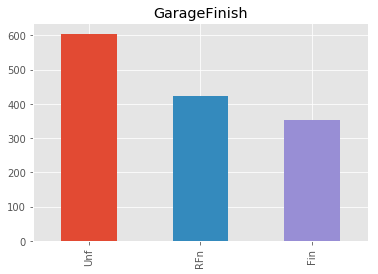

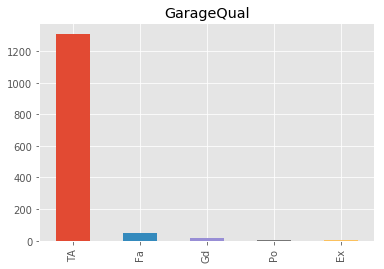

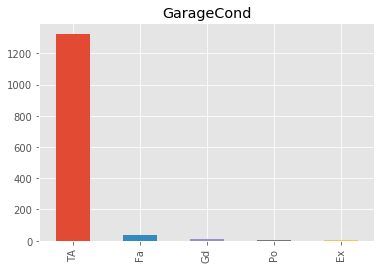

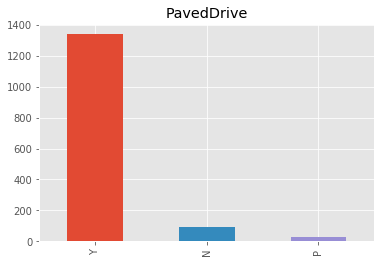

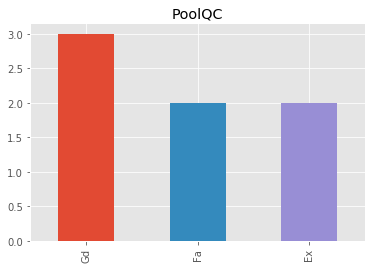

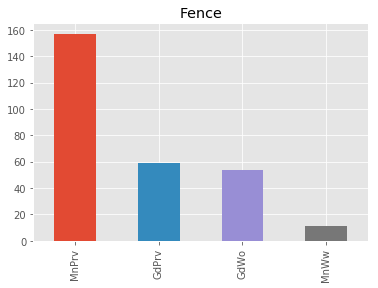

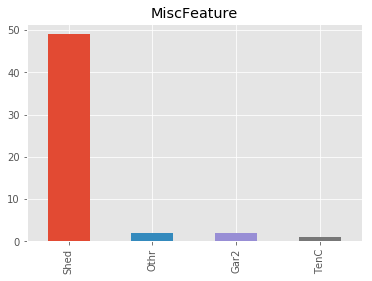

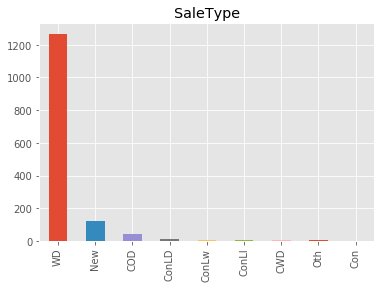

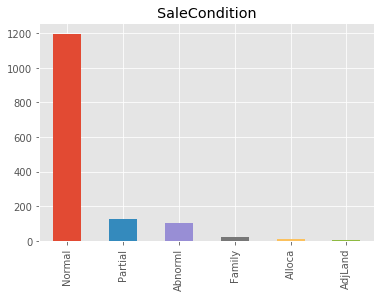

In [15]:
for n in train_cat.columns:
    print(plot(n))

In [16]:
def plot_num(x):
    
    train_num[x].plot.kde()
    plt.title(train_num[x].astype(str).name)
    plt.show()
    return ""

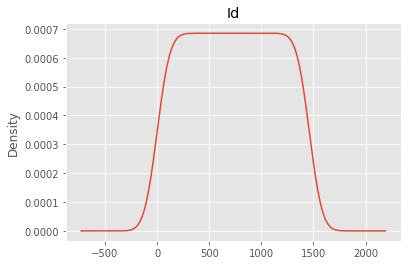

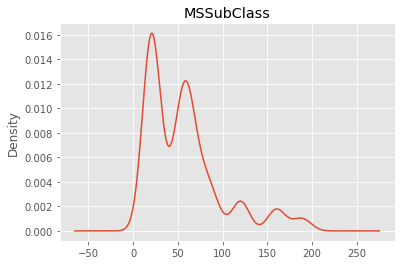

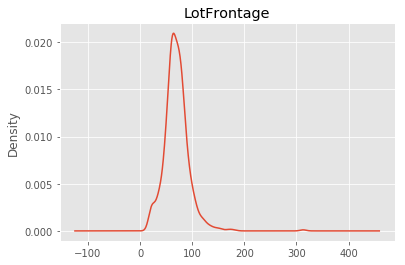

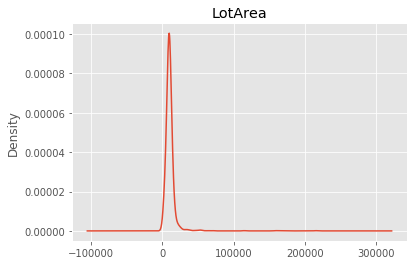

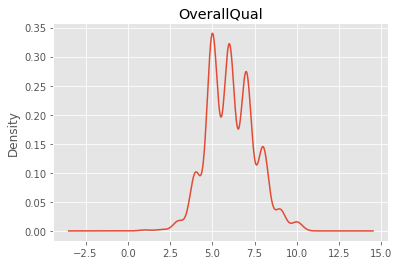

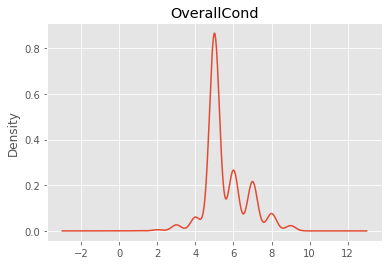

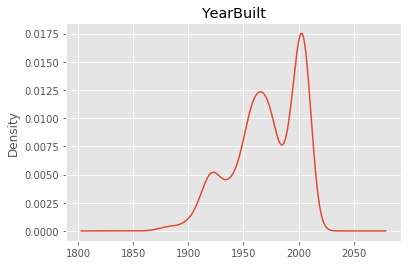

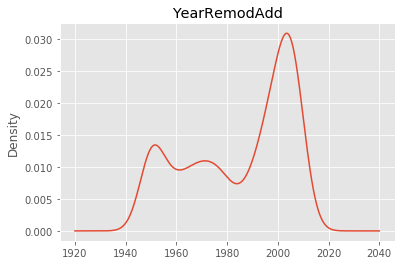

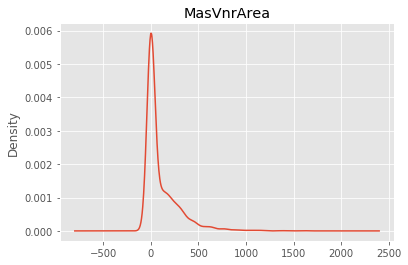

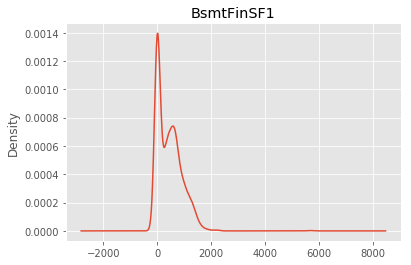

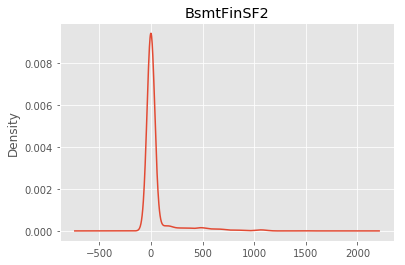

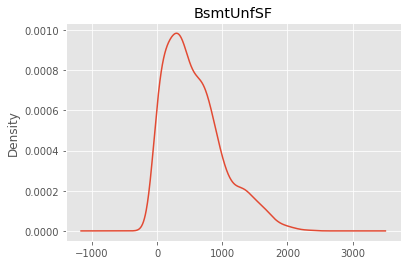

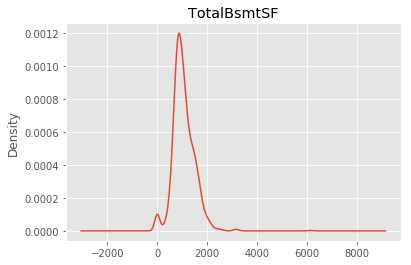

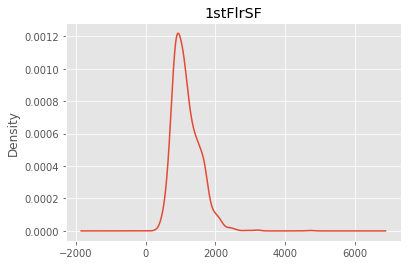

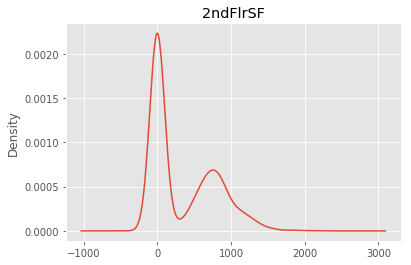

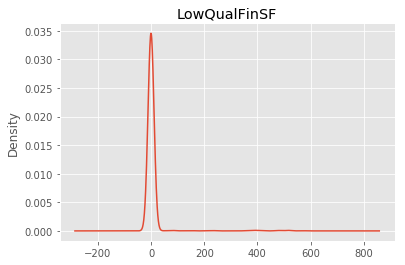

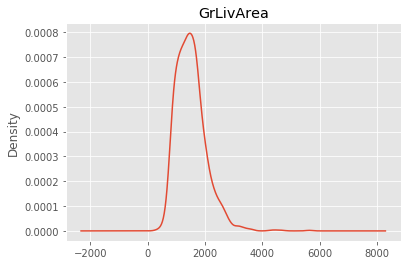

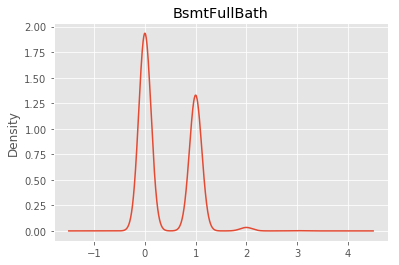

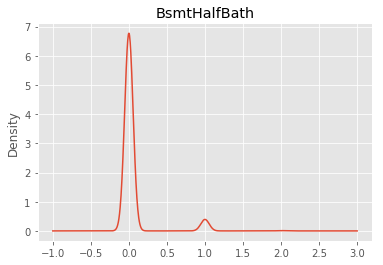

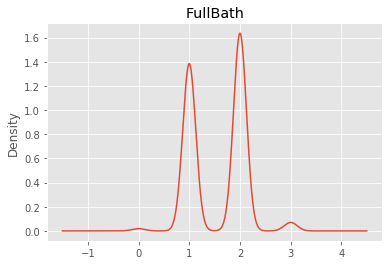

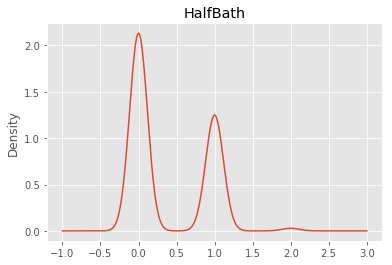

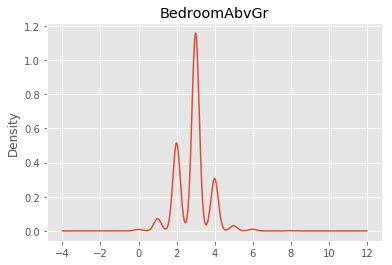

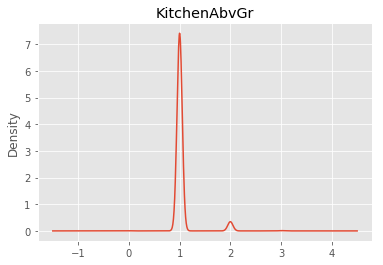

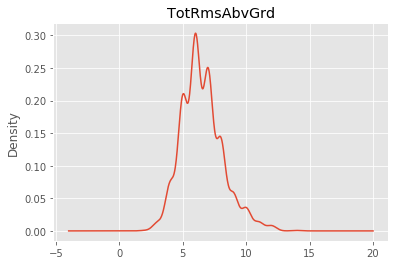

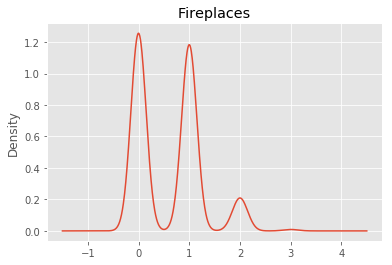

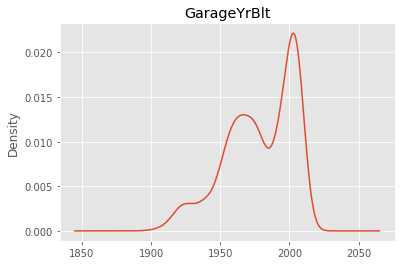

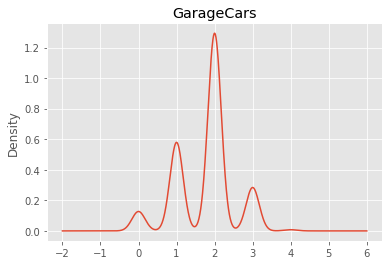

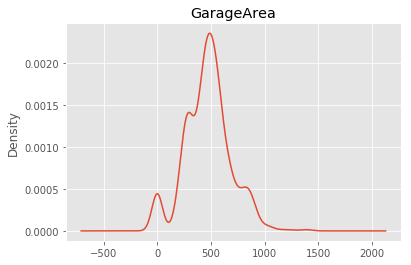

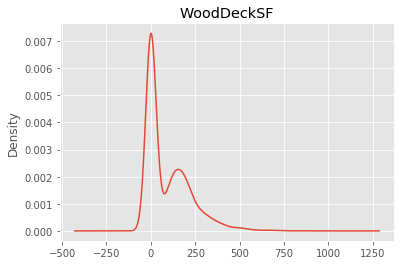

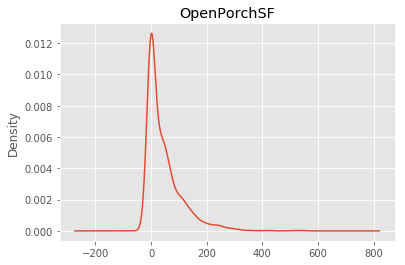

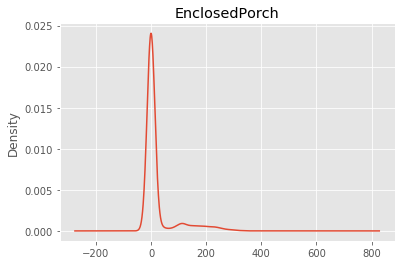

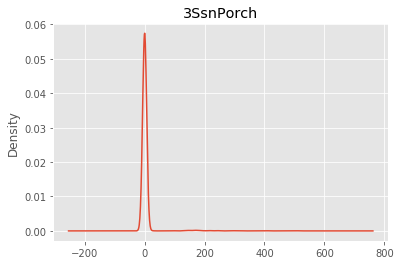

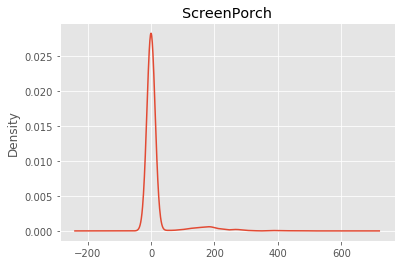

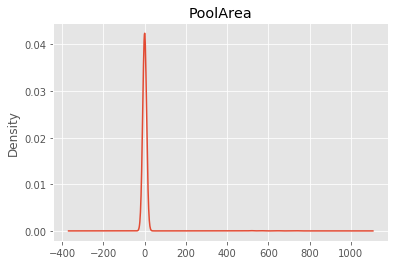

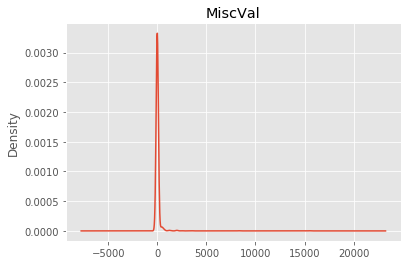

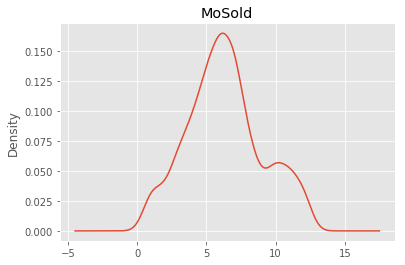

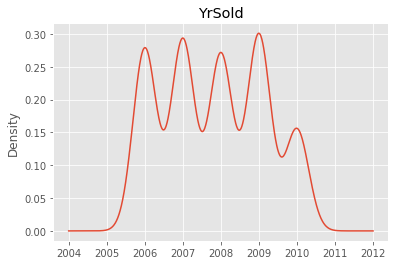

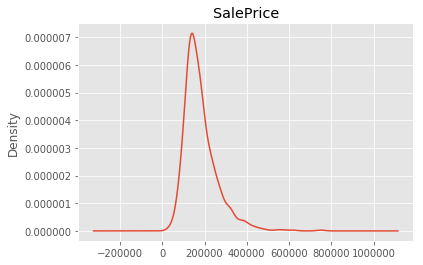

In [17]:
for n in train_num.columns:
    print(plot_num(n))

In [18]:
train_cat = train_cat.astype("object")
train_cat = train_cat.fillna("Not Available")
train_cat = train_cat.apply(pd.Categorical)

In [19]:
train_num.MasVnrArea = train_num.MasVnrArea.fillna(math.ceil(np.mean(train_num.MasVnrArea)))
train_num.GarageYrBlt = train_num.GarageYrBlt.fillna(math.ceil(np.mean(train_num.GarageYrBlt)))

In [20]:
train_num.LotFrontage = train_num.LotFrontage.fillna(999999)

In [21]:
X_test = train_num[train_num.LotFrontage == 999999].drop("LotFrontage" , axis = 1)
X_train = train_num[train_num.LotFrontage != 999999].drop("LotFrontage" , axis = 1)
y_test = train_num.LotFrontage[train_num.LotFrontage == 999999]
y_train = train_num.LotFrontage[train_num.LotFrontage != 999999]

In [22]:
steps = [('scaler' , StandardScaler()),('LinearRegression' , linear_model.LinearRegression())]

pipeline = Pipeline(steps)

pipeline.fit(X_train , y_train)
y_pred = (pipeline.predict(X_test))

In [23]:
abc = (y_pred)
train_num.LotFrontage[train_num.LotFrontage == 999999] = abc

In [24]:
train_num.LotFrontage = train_num.LotFrontage.astype("int")

In [25]:
train_num.corr().style.background_gradient().set_precision(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1,0.011,-0.00079,-0.033,-0.028,0.013,-0.013,-0.022,-0.05,-0.005,-0.006,-0.0079,-0.015,0.01,0.0056,-0.044,0.0083,0.0023,-0.02,0.0056,0.0068,0.038,0.003,0.027,-0.02,6.6e-06,0.017,0.018,-0.03,-0.00048,0.0029,-0.047,0.0013,0.057,-0.0062,0.021,0.00071,-0.022
MSSubClass,0.011,1,-0.39,-0.14,0.033,-0.059,0.028,0.041,0.023,-0.07,-0.066,-0.14,-0.24,-0.25,0.31,0.046,0.075,0.0035,-0.0023,0.13,0.18,-0.023,0.28,0.04,-0.046,0.081,-0.04,-0.099,-0.013,-0.0061,-0.012,-0.044,-0.026,0.0083,-0.0077,-0.014,-0.021,-0.084
LotFrontage,-0.00079,-0.39,1,0.46,0.23,-0.03,0.097,0.069,0.19,0.24,0.054,0.13,0.39,0.48,0.082,0.033,0.42,0.1,0.017,0.21,0.048,0.28,-0.0011,0.37,0.28,0.038,0.28,0.34,0.1,0.16,0.028,0.082,0.029,0.2,0.02,0.011,0.0031,0.36
LotArea,-0.033,-0.14,0.46,1,0.11,-0.0056,0.014,0.014,0.1,0.21,0.11,-0.0026,0.26,0.3,0.051,0.0048,0.26,0.16,0.048,0.13,0.014,0.12,-0.018,0.19,0.27,-0.025,0.15,0.18,0.17,0.085,-0.018,0.02,0.043,0.078,0.038,0.0012,-0.014,0.26
OverallQual,-0.028,0.033,0.23,0.11,1,-0.092,0.57,0.55,0.41,0.24,-0.059,0.31,0.54,0.48,0.3,-0.03,0.59,0.11,-0.04,0.55,0.27,0.1,-0.18,0.43,0.4,0.52,0.6,0.56,0.24,0.31,-0.11,0.03,0.065,0.065,-0.031,0.071,-0.027,0.79
OverallCond,0.013,-0.059,-0.03,-0.0056,-0.092,1,-0.38,0.074,-0.13,-0.046,0.04,-0.14,-0.17,-0.14,0.029,0.025,-0.08,-0.055,0.12,-0.19,-0.061,0.013,-0.087,-0.058,-0.024,-0.31,-0.19,-0.15,-0.0033,-0.033,0.07,0.026,0.055,-0.002,0.069,-0.0035,0.044,-0.078
YearBuilt,-0.013,0.028,0.097,0.014,0.57,-0.38,1,0.59,0.31,0.25,-0.049,0.15,0.39,0.28,0.01,-0.18,0.2,0.19,-0.038,0.47,0.24,-0.071,-0.17,0.096,0.15,0.78,0.54,0.48,0.22,0.19,-0.39,0.031,-0.05,0.0049,-0.034,0.012,-0.014,0.52
YearRemodAdd,-0.022,0.041,0.069,0.014,0.55,0.074,0.59,1,0.18,0.13,-0.068,0.18,0.29,0.24,0.14,-0.062,0.29,0.12,-0.012,0.44,0.18,-0.041,-0.15,0.19,0.11,0.62,0.42,0.37,0.21,0.23,-0.19,0.045,-0.039,0.0058,-0.01,0.021,0.036,0.51
MasVnrArea,-0.05,0.023,0.19,0.1,0.41,-0.13,0.31,0.18,1,0.26,-0.072,0.11,0.36,0.34,0.17,-0.069,0.39,0.085,0.027,0.28,0.2,0.1,-0.037,0.28,0.25,0.25,0.36,0.37,0.16,0.12,-0.11,0.019,0.061,0.012,-0.03,-0.0059,-0.0082,0.48
BsmtFinSF1,-0.005,-0.07,0.24,0.21,0.24,-0.046,0.25,0.13,0.26,1,-0.05,-0.5,0.52,0.45,-0.14,-0.065,0.21,0.65,0.067,0.059,0.0043,-0.11,-0.081,0.044,0.26,0.15,0.22,0.3,0.2,0.11,-0.1,0.026,0.062,0.14,0.0036,-0.016,0.014,0.39


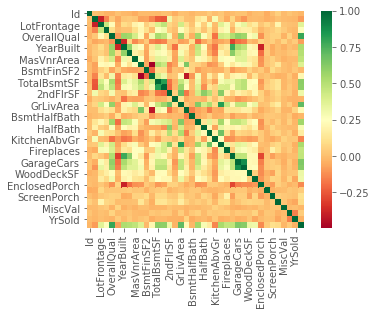

In [26]:
sns.heatmap(train_num.corr() , square = True , cmap = 'RdYlGn')
plt.show()

In [27]:
def plot_sale(x):
    
    plt.scatter(train_num["SalePrice"], train_num[x],alpha=0.5)
    plt.title(train_num[x].astype(str).name)
    plt.show()
    
    return " "

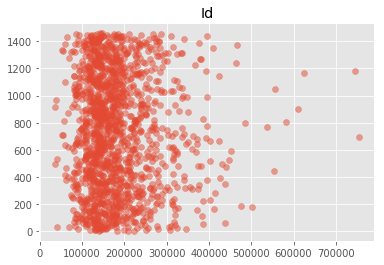

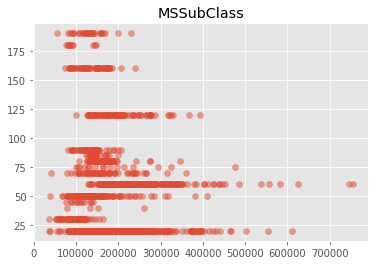

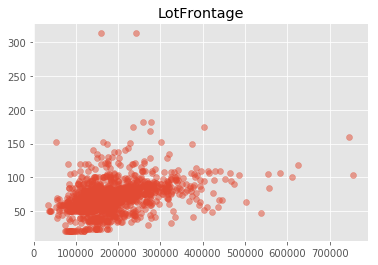

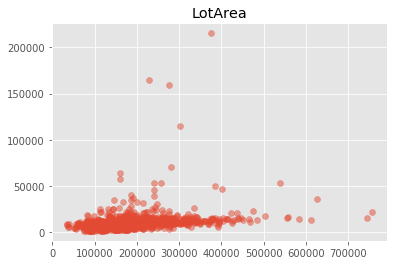

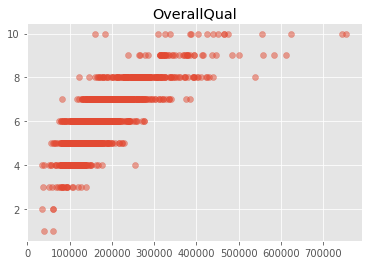

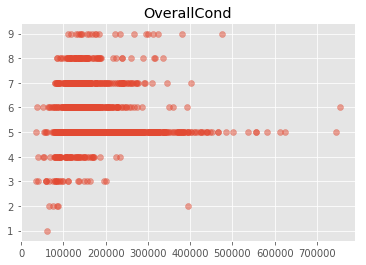

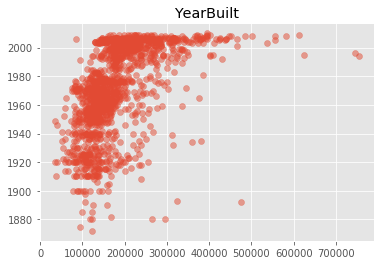

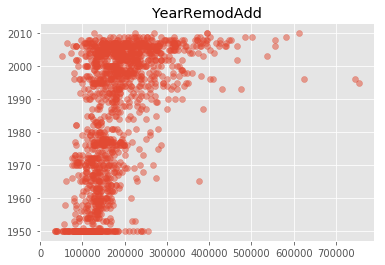

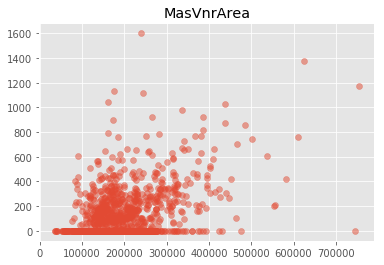

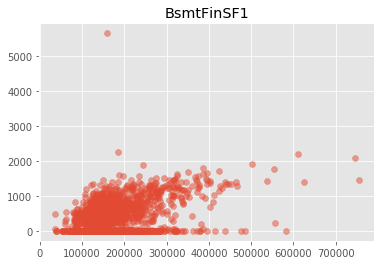

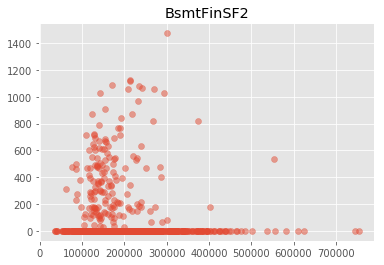

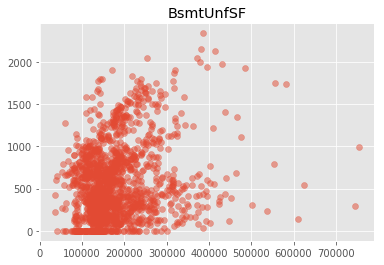

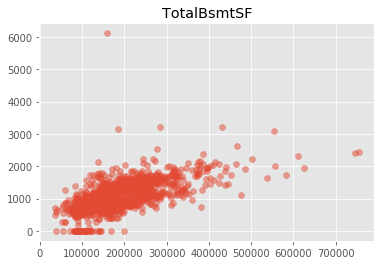

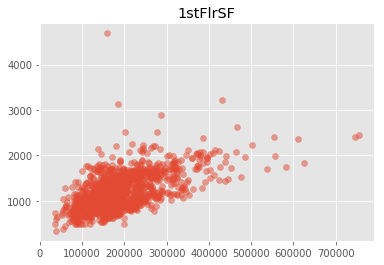

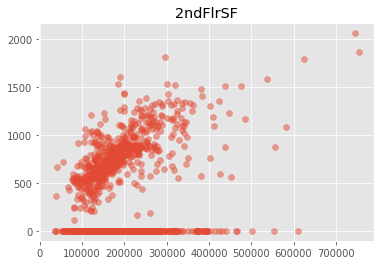

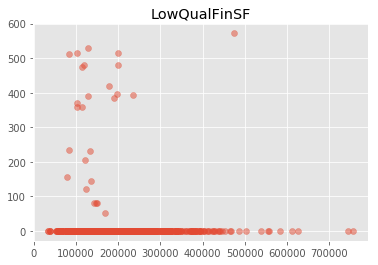

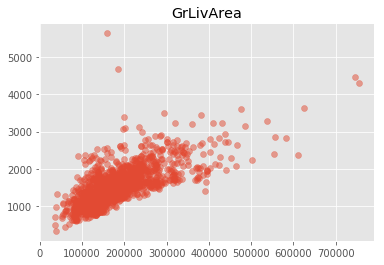

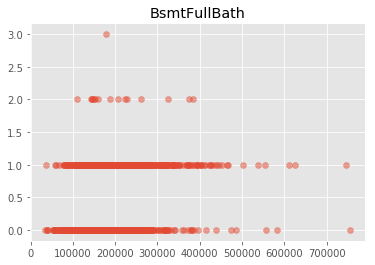

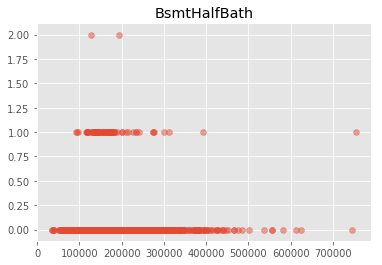

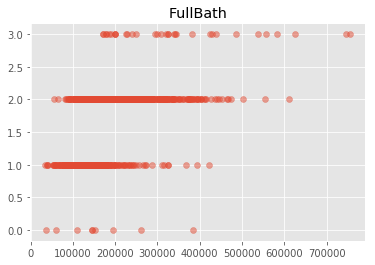

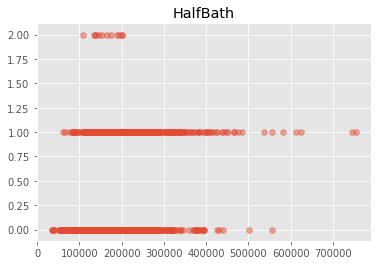

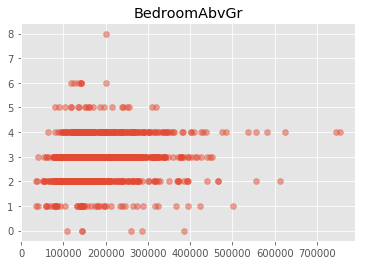

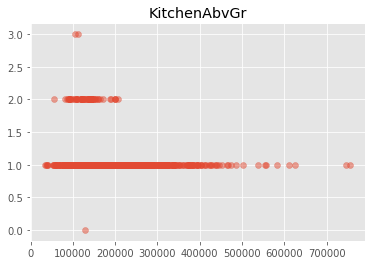

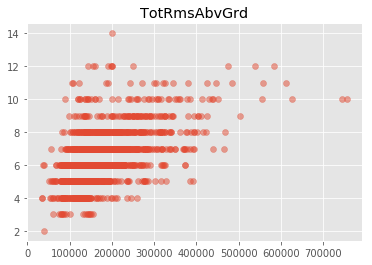

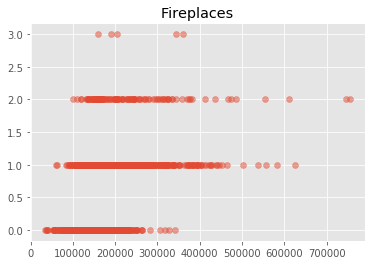

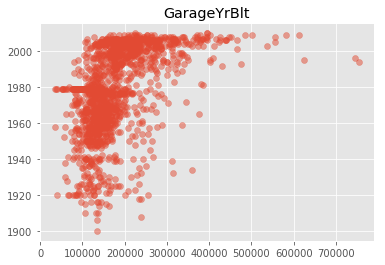

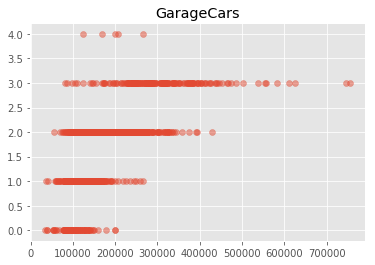

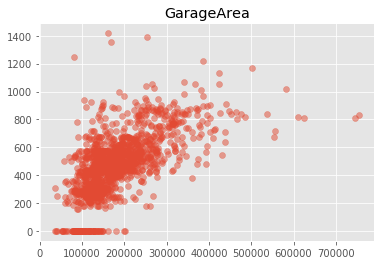

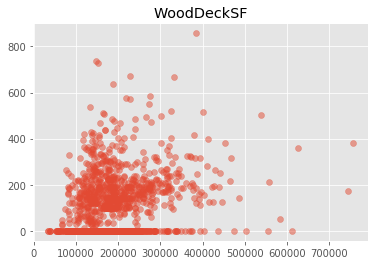

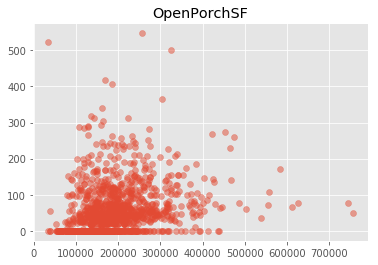

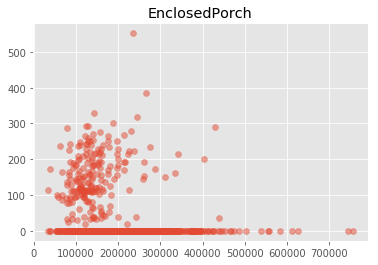

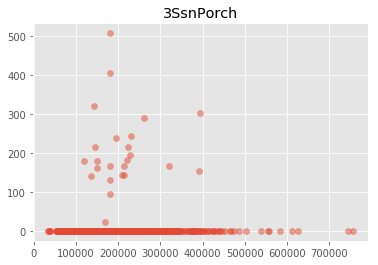

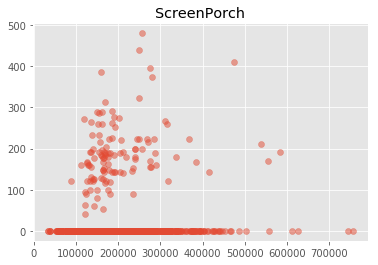

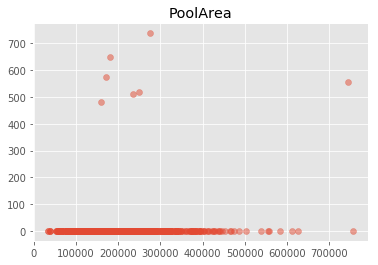

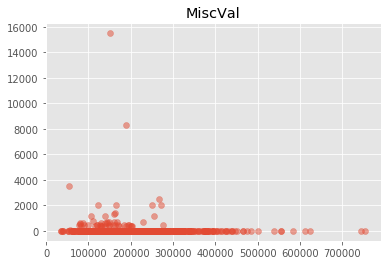

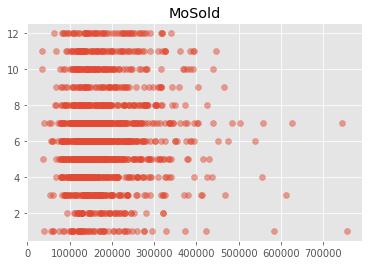

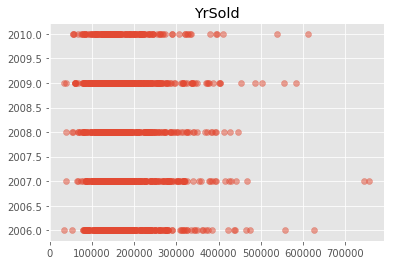

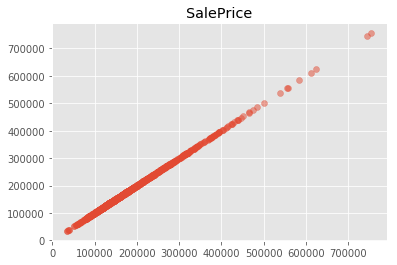

In [28]:
for n in train_num.columns:
    print(plot_sale(n))

In [29]:
train_cat_dummies = pd.get_dummies(train_cat)

train_cat_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Not Available,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
train_1 = pd.concat([train_cat_dummies , train_num] , axis = 1 )
train_1.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Not Available,Alley_Pave,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,1,0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,0,0,0,1,0,0,1,0,1,0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,0,0,0,1,0,0,1,0,1,0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,0,0,0,1,0,0,1,0,1,0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,0,0,0,1,0,0,1,0,1,0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [31]:
X_sale = train_1.drop("SalePrice" , axis = 1)
X_sale = np.sqrt(X_sale)
y_sale = train_1.SalePrice

X_train, X_val, y_train, y_val = train_test_split(X_sale, y_sale, test_size = 0.3, random_state=42)

In [34]:
X_sale = train_1.drop("SalePrice" , axis = 1)
y_sale = train_1.SalePrice

X_train, X_val, y_train, y_val= train_test_split(X_sale, y_sale, test_size = 0.3, random_state=42)

In [35]:
steps_1 = [('scaler' , StandardScaler()),('LinearRegression' , linear_model.LinearRegression())]

pipeline_1 = Pipeline(steps_1)

pipeline_1.fit(X_train , y_train)
y_pred = pd.DataFrame((pipeline_1.predict(X_val)))

RMSE = np.sqrt(mean_squared_error(y_val,y_pred ))
print("RMSE: " , RMSE)
MSE = mean_squared_error(y_val,y_pred )
print("MSE: " ,MSE)
print("R^2: " , r2_score(y_val, y_pred))

RMSE:  1.256506993808065e+17
MSE:  1.5788098254885806e+34
R^2:  -2.2625230895092766e+24


In [36]:
def unskew(x):
    
    if skew(train_num[x]) > 0.6:
        train_num[x] = np.sqrt(train_num[x])
    else:
        pass
    return train_num[x]

In [37]:
train_num_1 = train_num.drop("Id" , axis = 1)


In [38]:
for n in train_num_1.columns:
    unskew(n)

In [39]:
train_2 = pd.concat([train_cat_dummies , train_num_1] , axis = 1 )

X_sale_2 = train_2.drop("SalePrice" , axis = 1)
y_sale_2 = train_2.SalePrice

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_sale_2, y_sale_2, test_size = 0.3, random_state=42)

In [41]:
steps_2 = [('scaler' , StandardScaler()),('LinearRegression' , linear_model.LinearRegression())]

pipeline_2 = Pipeline(steps_2)

pipeline_2.fit(X_train_2 , y_train_2)
y_pred = pd.DataFrame((pipeline_2.predict(X_val_2)))

RMSE = np.sqrt(mean_squared_error(y_val_2,y_pred ))
print("RMSE: " , RMSE)
MSE = mean_squared_error(y_val_2,y_pred )
print("MSE: " ,MSE)
print("R^2: " , r2_score(y_val_2, y_pred))

RMSE:  9.944500024531053e+16
MSE:  9.889308073789811e+33
R^2:  -1.4171933500157832e+24


In [42]:
ridge = Ridge(alpha = 0.4 , normalize = True)

ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_val)
print("RMSE: " , np.sqrt(mean_squared_error(y_val,ridge_pred)))
print("MSE: " , mean_squared_error(y_val,ridge_pred))
print("R^2: " , r2_score(y_val, ridge_pred))

RMSE:  28441.953162964062
MSE:  808944699.7242414
R^2:  0.8840736843846376


In [43]:
lasso = Lasso(alpha = 0.4, normalize = True)

lasso.fit(X_train,y_train)

lasso_pred = ridge.predict(X_val)
print("RMSE: " , np.sqrt(mean_squared_error(y_val,lasso_pred)))
print("MSE: " , mean_squared_error(y_val,lasso_pred))
print("R^2: " , r2_score(y_val, lasso_pred))

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


RMSE:  28441.953162964062
MSE:  808944699.7242414
R^2:  0.8840736843846376


In [44]:
param_dist = {'max_depth' : [3,10],
             'max_features' : np.arange(1,50),
             'min_samples_leaf':np.arange(1,50),
             "criterion" :["gini" , "entropy"]}

steps_2 = [('scaler' , StandardScaler()), ("GridSearch" , GridSearchCV(DecisionTreeClassifier(), param_dist , cv = 5 , verbose = 1))]

pipeline_2 = Pipeline(steps_2)
pipeline_2.fit(X_train , y_train)
y_pred_2 = pd.DataFrame(pipeline_2.predict(X_val))
#print(tree.best_params_)
#print(tree.best_score_)
print("RMSE: " , np.sqrt(mean_squared_error(y_val,y_pred_2)))
print("MSE: " ,mean_squared_error(y_val,y_pred_2))
print("R^2: " , r2_score(y_val, y_pred_2))

Fitting 5 folds for each of 9604 candidates, totalling 48020 fits


[Parallel(n_jobs=1)]: Done 48020 out of 48020 | elapsed: 29.7min finished


RMSE:  65105.51555663296
MSE:  4238728155.894977
R^2:  0.3925664656984472


In [45]:
predictors_sale = train_1.drop(["SalePrice"] , axis = 1).values
target_sale = train_1.SalePrice.values
n_cols = predictors_sale.shape[1]

model_data = Sequential()
model_data.add(Dense(100 , activation = 'relu' , input_shape = (n_cols,)))
for n in range (1,100):
    model_data.add(Dense(n,activation = 'relu'))
model_data.add(Dense(1, activation = 'softmax'))

model_data.compile(optimizer = 'adam' , loss = 'mean_squared_error' , 
                  metrics = ['accuracy'])
model_data.fit(predictors_sale , target_sale)

Epoch 1/1
1460/1460 [==============================] - ETA: 6:57 - loss: 40021467136.0000 - acc: 0.0000e+0 - ETA: 1:16 - loss: 40403077529.6000 - acc: 0.0000e+0 - ETA: 44s - loss: 38927087360.0000 - acc: 0.0000e+0 - ETA: 30s - loss: 40914323083.6364 - acc: 0.0000e+ - ETA: 21s - loss: 39917769581.7143 - acc: 0.0000e+ - ETA: 14s - loss: 40528426666.6667 - acc: 0.0000e+ - ETA: 11s - loss: 39650911768.3810 - acc: 0.0000e+ - ETA: 8s - loss: 40162470741.3333 - acc: 0.0000e+00 - ETA: 6s - loss: 40502112256.0000 - acc: 0.0000e+0 - ETA: 4s - loss: 40176202785.0323 - acc: 0.0000e+0 - ETA: 3s - loss: 39840388476.3429 - acc: 0.0000e+0 - ETA: 2s - loss: 39853253254.7368 - acc: 0.0000e+0 - ETA: 1s - loss: 39512980704.7805 - acc: 0.0000e+0 - ETA: 0s - loss: 39081693684.6222 - acc: 0.0000e+0 - 10s 7ms/step - loss: 39038905627.3534 - acc: 0.0000e+00


In [46]:
X_train.iloc[:,1:] = X_train.iloc[:,1:].apply(pd.to_numeric)
y_train = pd.to_numeric(y_train)
X_val.iloc[:,1:] = X_val.iloc[:,1:].apply(pd.to_numeric)
y_val = pd.to_numeric(y_val) 

In [47]:
xg = xgb.XGBClassifier(objective='reg:linear', n_estimators = 10, seed=1234)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_val)

accuracy =  accuracy_score(y_val, y_pred)
print(accuracy)

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.01141552511415525


In [48]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [49]:
def extract():
    test_object = []
    test_int = []
    for n in range(0,test.shape[1]):
    
        if test[(test.columns[n])].dtype == "O":
            test_object.append(test[(test.columns[n])])
            #print(pd.DataFrame(test_object))
        elif test[test.columns[n]].dtype != "O":
            test_int.append(test[test.columns[n]])
            #print(pd.DataFrame(test_int))
        else:
            pass
        
        
        extract.test_object = (pd.DataFrame(test_object)).T
        extract.test_int = (pd.DataFrame(test_int)).T

In [60]:
extract()

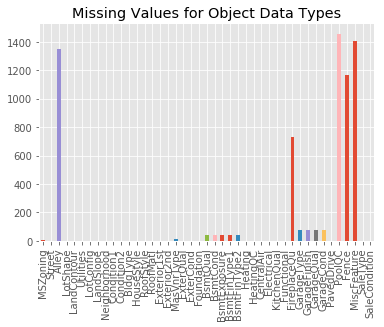

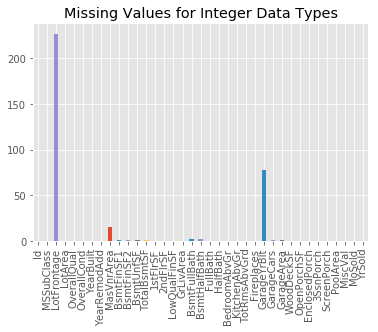

In [51]:
extract.test_object.isnull().sum().plot.bar()
plt.title("Missing Values for Object Data Types")
plt.show()
#plt.subplot(2,1,2)
extract.test_int.isnull().sum().plot.bar()
plt.title("Missing Values for Integer Data Types")
plt.show()

In [52]:
remodeled_test = pd.DataFrame({"No":(test.YearBuilt == test.YearRemodAdd).sum() , "Yes":(test.YearBuilt != test.YearRemodAdd).sum()}, index = [0])

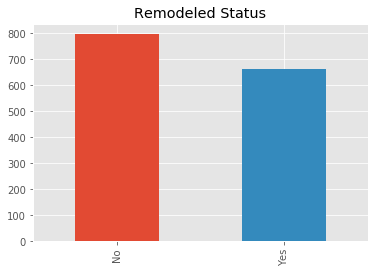

In [53]:
remodeled_test.unstack().plot.bar()
plt.xticks([0,1],["No" , "Yes"])
plt.title("Remodeled Status")
plt.show()

In [61]:
test_cat = extract.test_object.apply(pd.Categorical)
test_num = extract.test_int

In [55]:
def plot_test(x):
    
    test_cat[x].value_counts().plot.bar()
    plt.title(test_cat[x].astype(str).name)
    plt.show()
    return ""

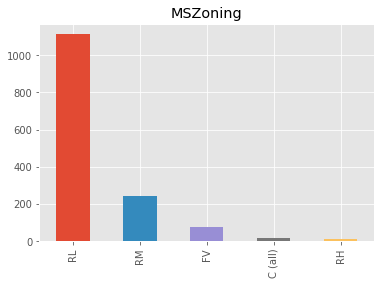

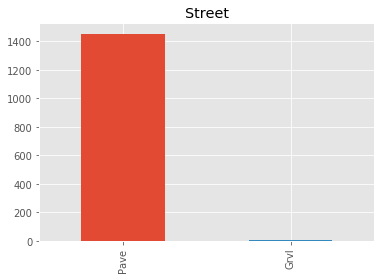

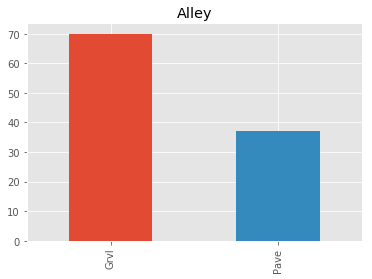

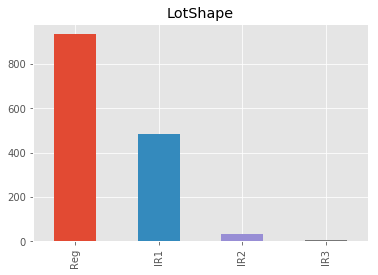

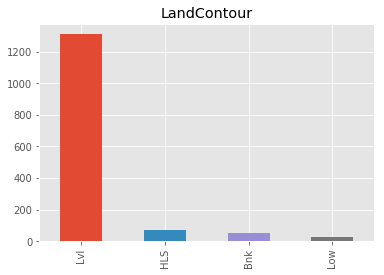

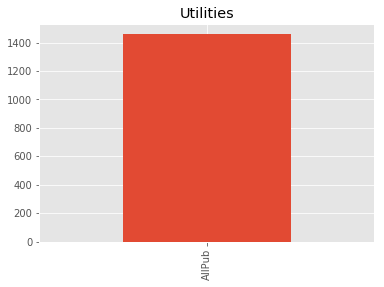

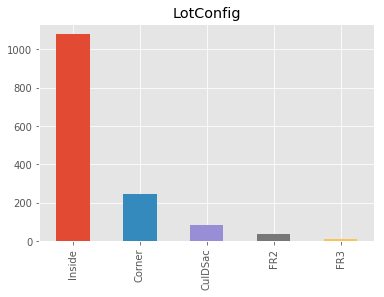

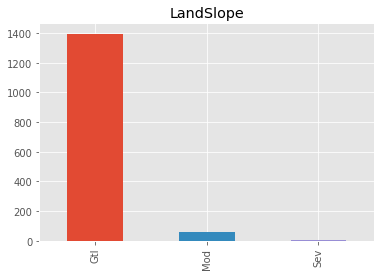

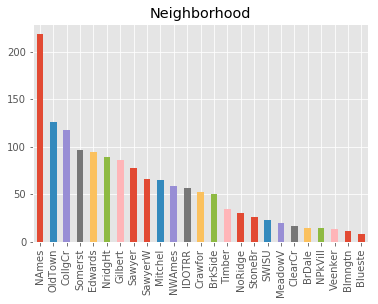

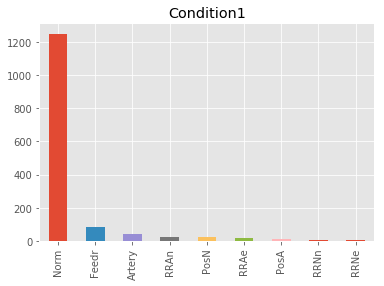

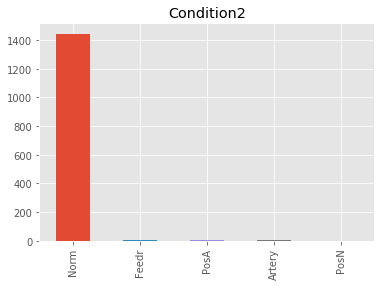

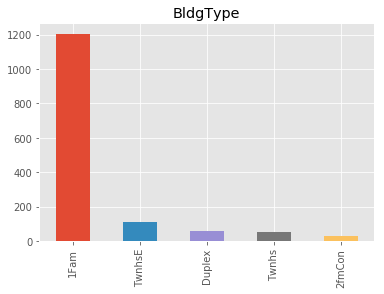

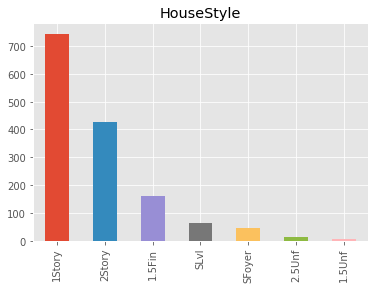

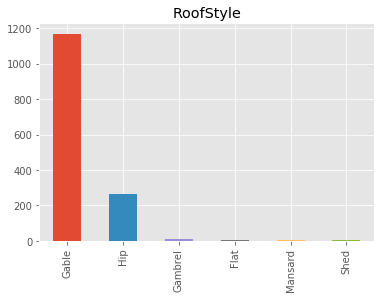

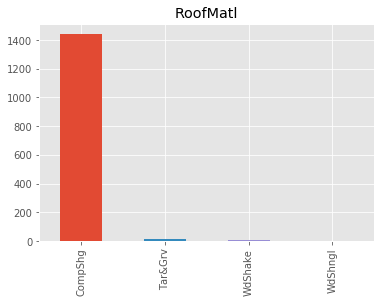

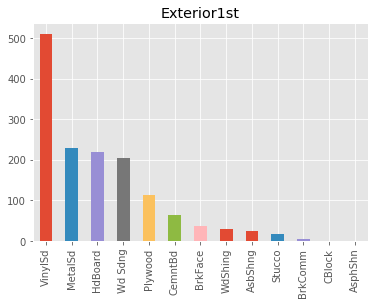

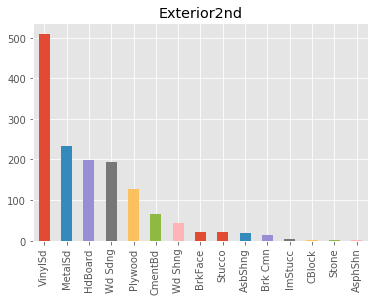

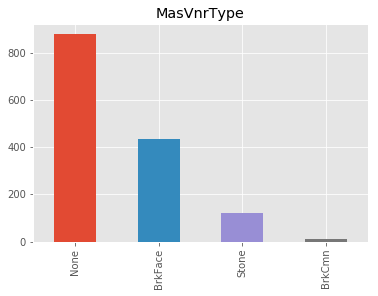

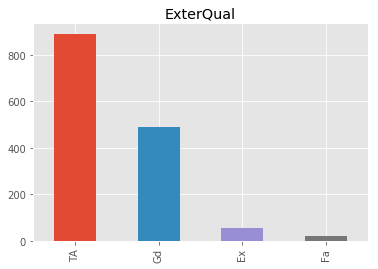

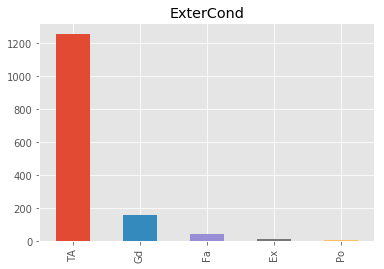

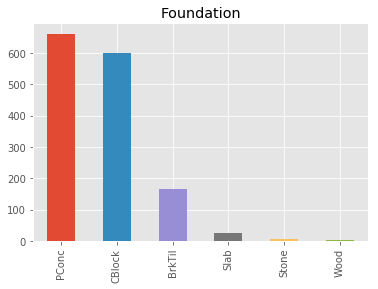

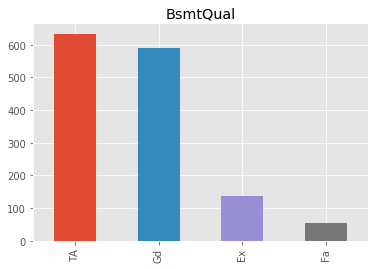

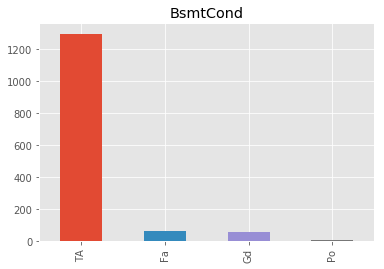

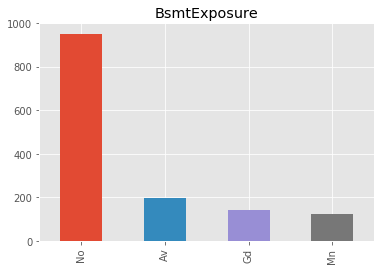

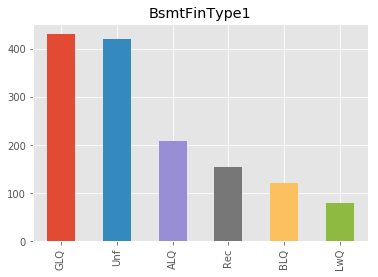

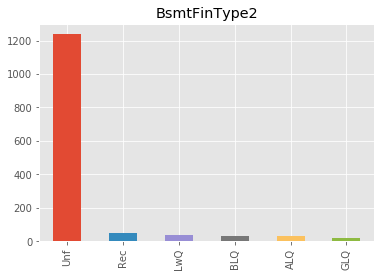

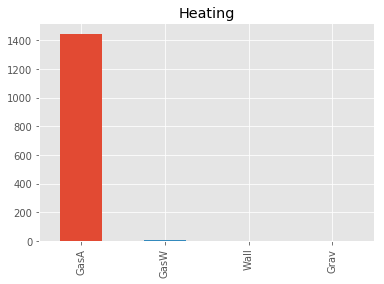

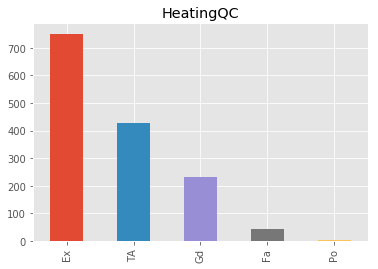

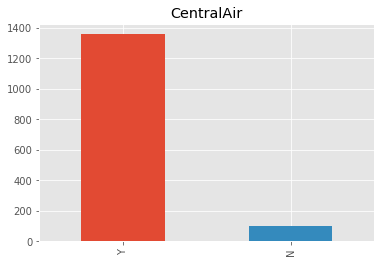

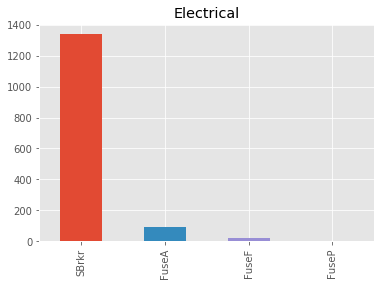

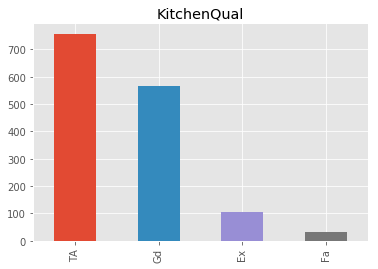

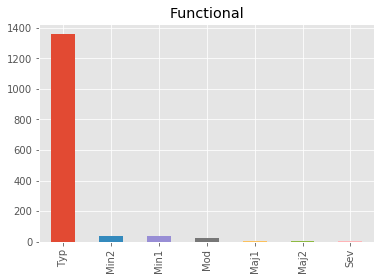

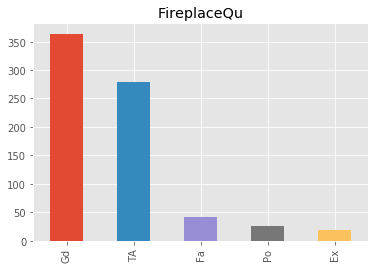

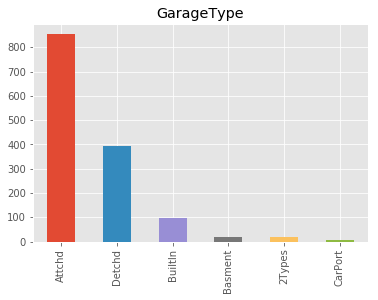

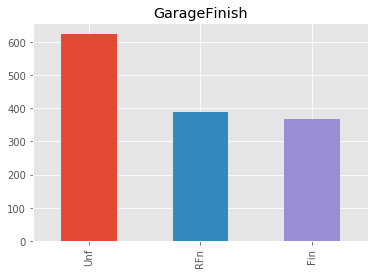

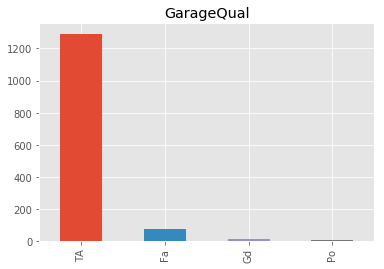

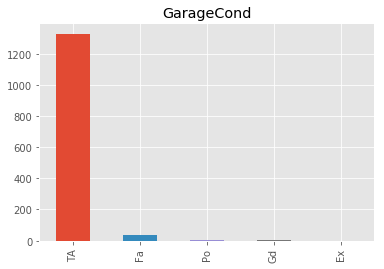

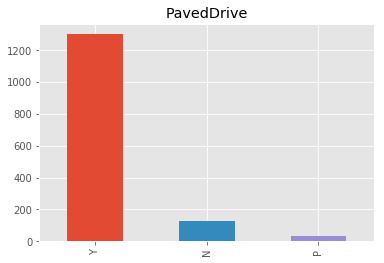

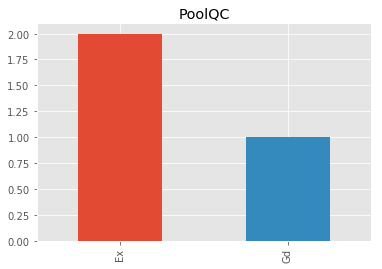

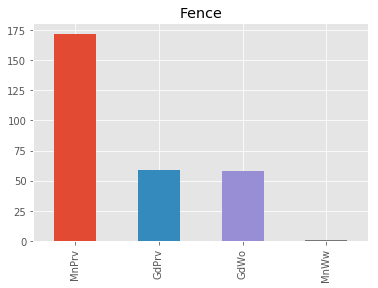

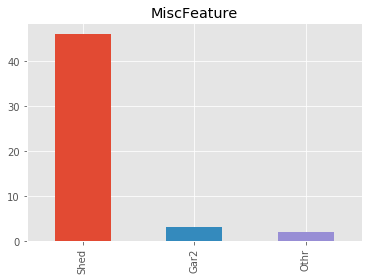

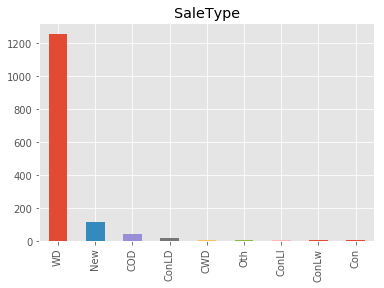

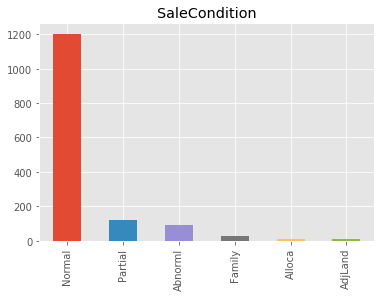

In [56]:
for n in test_cat.columns:
    print(plot_test(n))

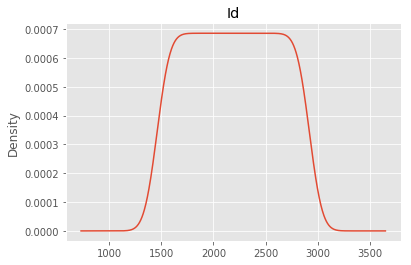

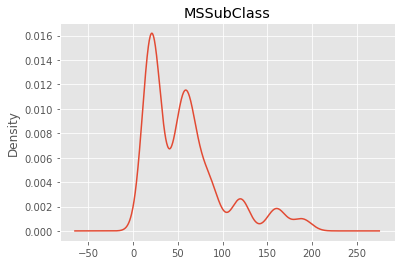

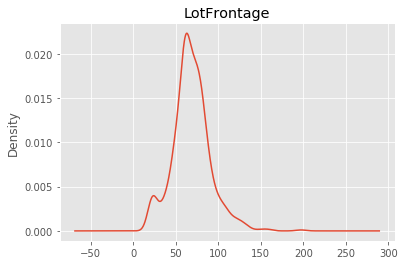

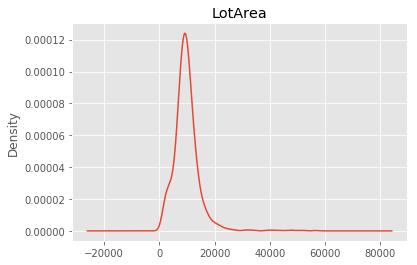

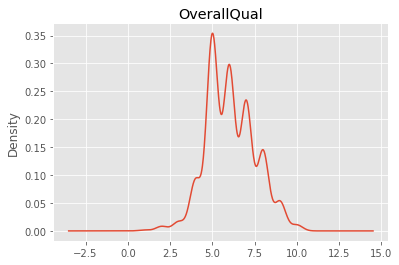

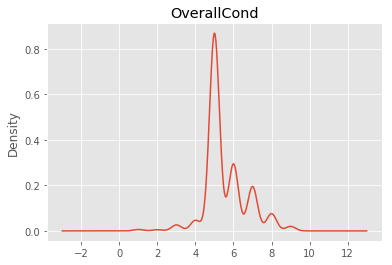

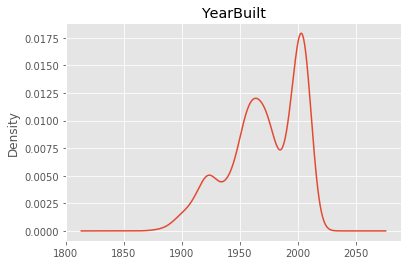

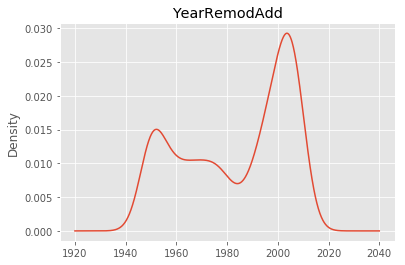

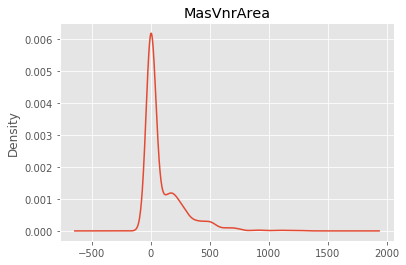

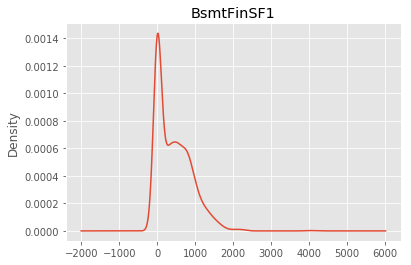

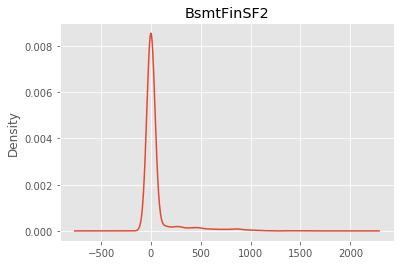

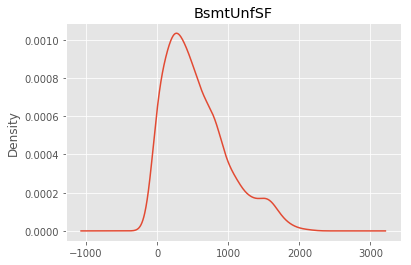

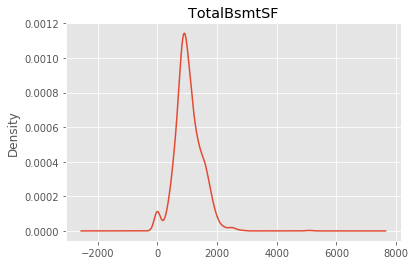

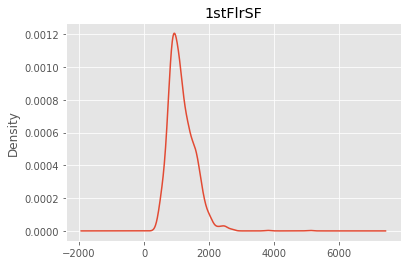

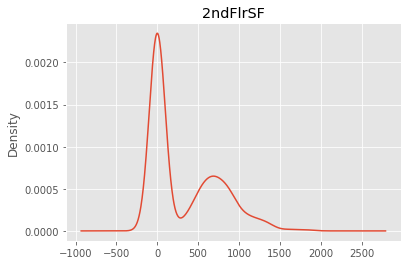

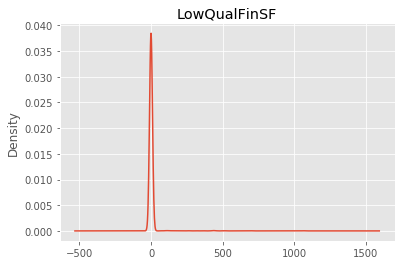

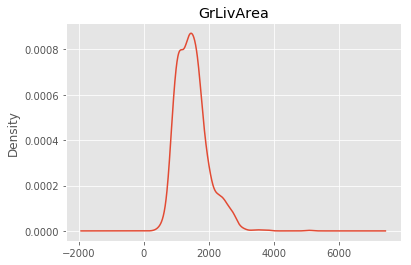

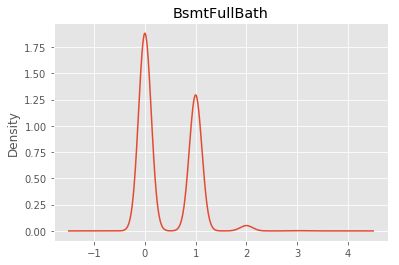

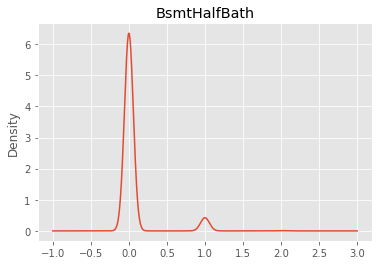

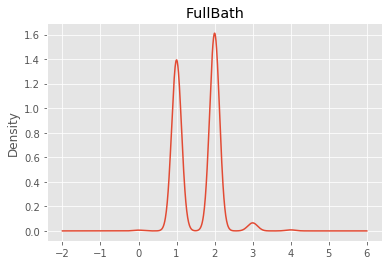

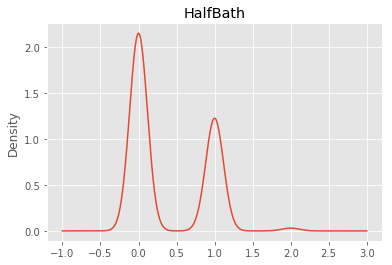

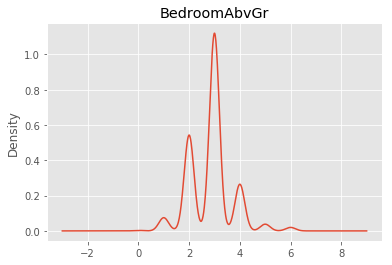

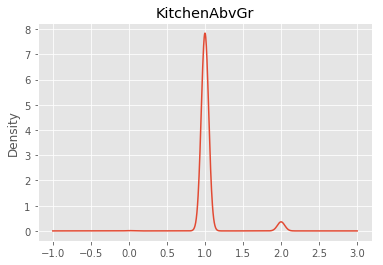

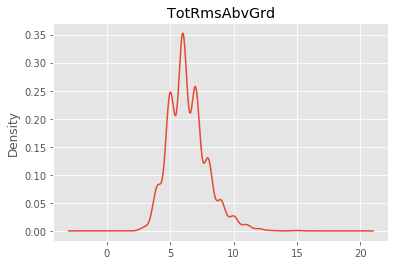

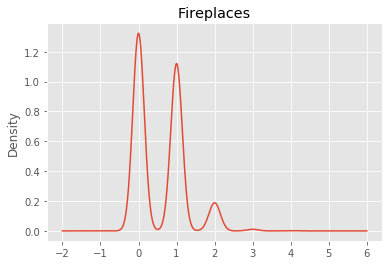

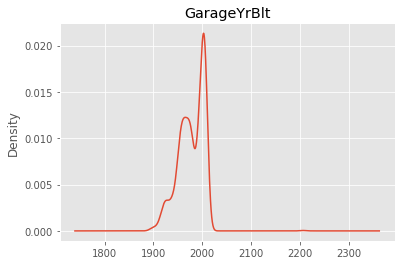

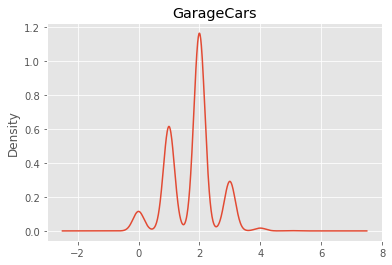

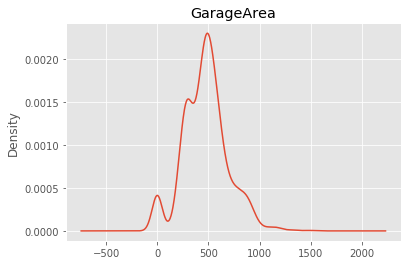

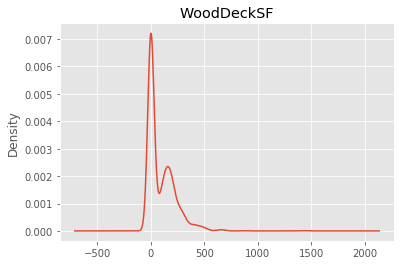

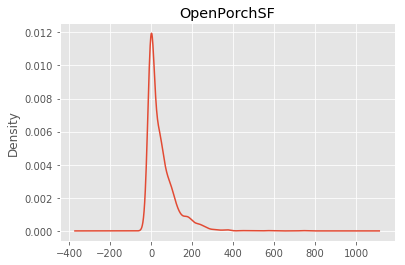

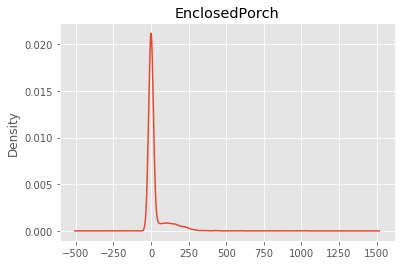

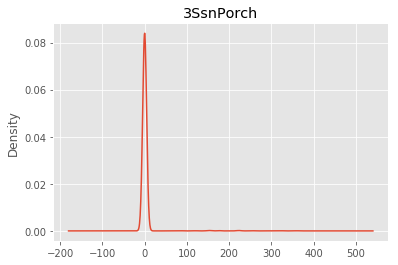

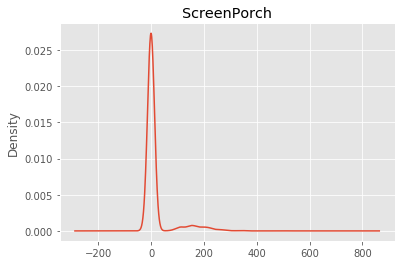

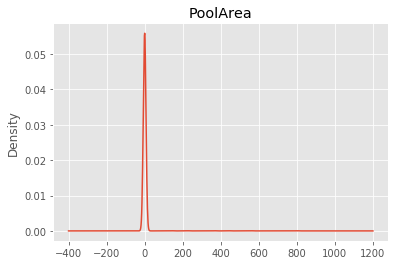

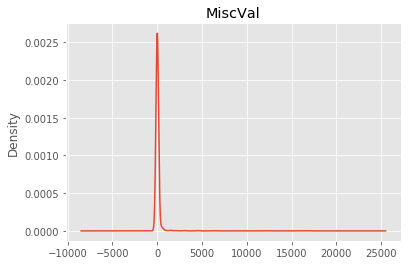

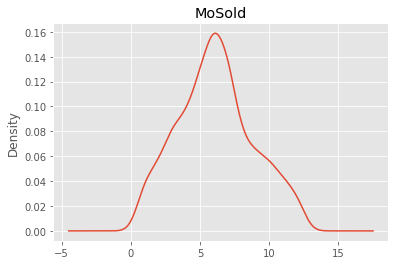

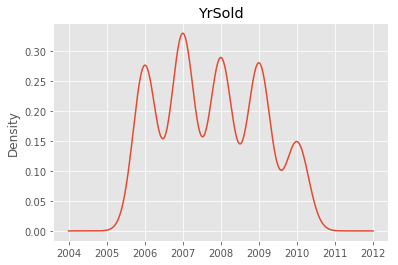

In [57]:
def plot_num_test(x):
    
    test_num[x].plot.kde()
    plt.title(test_num[x].astype(str).name)
    plt.show()
    return ""
    
for n in test_num.columns:
    print(plot_num_test(n))

In [62]:
test_cat = test_cat.astype("object")
test_cat = test_cat.fillna("Not Available")
test_cat = test_cat.apply(pd.Categorical)

In [70]:
test_num.LotFrontage = test_num.LotFrontage.fillna(0)
for n in test_num:
    test_num[n].fillna(math.ceil(np.mean(test_num[n])) , inplace = True)

In [63]:
test_num.MasVnrArea = test_num.MasVnrArea.fillna(math.ceil(np.mean(test_num.MasVnrArea)))
test_num.GarageYrBlt = test_num.GarageYrBlt.fillna(math.ceil(np.mean(test_num.GarageYrBlt)))

test_num.LotFrontage = test_num.LotFrontage.astype("int64") 


In [80]:
X_test = test_num[test_num.LotFrontage == 0].drop("LotFrontage" , axis = 1)
X_train = test_num[test_num.LotFrontage != 0].drop("LotFrontage" , axis = 1)
y_test = test_num.LotFrontage[test_num.LotFrontage == 0]
y_train = test_num.LotFrontage[test_num.LotFrontage != 0]


In [81]:
steps = [('scaler' , StandardScaler()),('LinearRegression' , linear_model.LinearRegression())]

pipeline = Pipeline(steps)

pipeline.fit(X_test , y_test)
y_pred = (pipeline.predict(X_test))

In [82]:
abc = (y_pred)
test_num.LotFrontage[test_num.LotFrontage == 0] = abc

In [83]:
test_num.corr().style.background_gradient().set_precision(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1,0.005,0.012,0.051,-0.065,0.0096,-0.059,-0.079,-0.021,-0.046,0.016,0.0012,-0.04,-0.018,-0.0099,-0.02,-0.025,-0.032,0.0064,-0.064,-0.05,0.001,-0.017,0.00072,-0.036,-0.05,-0.054,-0.051,0.016,-0.002,0.021,-0.026,0.026,0.05,-0.0057,0.14,-0.97
MSSubClass,0.005,1,-0.25,-0.36,0.035,-0.072,0.041,0.046,-0.012,-0.059,-0.079,-0.11,-0.2,-0.25,0.31,0.005,0.069,0.015,-0.006,0.15,0.18,0.0055,0.24,0.041,-0.064,0.086,-0.053,-0.11,-0.023,-0.025,-0.029,-0.03,-0.072,-0.018,-0.046,0.011,-0.0084
LotFrontage,0.012,-0.25,1,0.23,0.088,-0.018,0.018,0.062,0.11,0.062,-5.7e-05,0.11,0.17,0.24,-0.057,-0.018,0.15,0.037,-0.029,0.04,-0.048,0.07,0.0068,0.17,0.065,0.025,0.12,0.17,0.019,0.1,0.02,-0.027,0.068,0.1,0.056,0.019,-0.017
LotArea,0.051,-0.36,0.23,1,0.11,-0.1,0.048,0.037,0.19,0.19,0.054,0.072,0.28,0.46,-0.0079,-0.012,0.37,0.097,0.0088,0.15,0.08,0.18,-0.032,0.29,0.28,0.018,0.26,0.32,0.16,0.16,0.1,-0.0018,0.089,0.14,0.14,0.0052,-0.051
OverallQual,-0.065,0.035,0.088,0.11,1,-0.096,0.62,0.59,0.45,0.32,-0.028,0.24,0.56,0.48,0.2,-0.068,0.56,0.21,-0.046,0.51,0.27,0.046,-0.13,0.35,0.38,0.57,0.6,0.57,0.27,0.29,-0.16,0.0028,0.022,-0.012,0.034,-0.0088,-0.012
OverallCond,0.0096,-0.072,-0.018,-0.1,-0.096,1,-0.36,0.022,-0.14,-0.055,0.043,-0.14,-0.18,-0.17,-0.019,-0.0096,-0.16,-0.027,0.059,-0.24,-0.12,-0.03,-0.087,-0.13,-0.039,-0.3,-0.18,-0.16,0.043,-0.1,0.072,0.071,0.033,-0.037,0.0072,-0.0098,0.016
YearBuilt,-0.059,0.041,0.018,0.048,0.62,-0.36,1,0.63,0.31,0.31,-0.0082,0.11,0.43,0.34,0.025,-0.1,0.29,0.23,-0.026,0.47,0.3,-0.036,-0.099,0.13,0.19,0.8,0.54,0.48,0.23,0.21,-0.36,-0.0054,-0.032,-0.0011,0.0073,0.016,-0.011
YearRemodAdd,-0.079,0.046,0.062,0.037,0.59,0.022,0.63,1,0.21,0.18,-0.056,0.15,0.3,0.24,0.18,-0.06,0.35,0.15,-0.079,0.48,0.24,-0.0044,-0.14,0.2,0.15,0.64,0.43,0.38,0.23,0.26,-0.24,0.026,-0.054,-0.035,0.003,0.012,0.03
MasVnrArea,-0.021,-0.012,0.11,0.19,0.45,-0.14,0.31,0.21,1,0.34,0.037,0.064,0.43,0.45,0.063,-0.046,0.42,0.2,0.0011,0.24,0.18,0.053,-0.066,0.27,0.3,0.25,0.36,0.37,0.17,0.16,-0.11,0.0058,0.069,-0.0054,0.11,0.0051,-0.029
BsmtFinSF1,-0.046,-0.059,0.062,0.19,0.32,-0.055,0.31,0.18,0.34,1,-0.06,-0.46,0.55,0.47,-0.19,-0.068,0.22,0.63,0.086,0.1,-0.019,-0.12,-0.092,0.06,0.33,0.23,0.29,0.32,0.24,0.14,-0.097,0.088,0.13,0.012,0.17,0.013,0.031


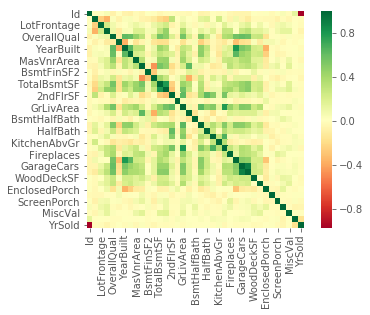

In [84]:
sns.heatmap(test_num.corr() , square = True , cmap = 'RdYlGn')
plt.show()

In [85]:
test_cat_dummies = pd.get_dummies(test_cat)

In [86]:
test_1 = pd.concat([test_cat_dummies , test_num] , axis = 1 )

In [87]:
test_1["SalePrice"] = 0
test_1.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_Not Available,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Not Available,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,0,1,0,1,...,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,0
1,0,0,0,0,1,0,0,1,0,1,...,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,0
2,0,0,0,0,1,0,0,1,0,1,...,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,0
3,0,0,0,0,1,0,0,1,0,1,...,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,0
4,0,0,0,0,1,0,0,1,0,1,...,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,0


In [88]:
X_test_sale = train_1.drop("SalePrice" , axis = 1)
y_test_sale = train_1.SalePrice

X_train_test, X_test, y_train_test, y_test = train_test_split(X_test_sale, y_test_sale, test_size = 0.3, random_state=42)

In [89]:
steps_1 = [('scaler' , StandardScaler()),
           ('LinearRegression' , linear_model.LinearRegression()),
           ]

pipeline_1 = Pipeline(steps_1)

pipeline_1.fit(X_train_test , y_train_test)
y_pred = pd.DataFrame((pipeline_1.predict(X_test)))

RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: " , RMSE)
MSE = mean_squared_error(y_test,y_pred )
print("MSE: " ,MSE)
print("R^2: " , r2_score(y_test, y_pred))

RMSE:  1.256506993808065e+17
MSE:  1.5788098254885806e+34
R^2:  -2.2625230895092766e+24


In [90]:
ridge = Ridge(alpha = 0.4 , normalize = True)

ridge.fit(X_train_test, y_train_test)
ridge_pred = ridge.predict(X_test)
print("RMSE: " , np.sqrt(mean_squared_error(y_test,ridge_pred)))
print("MSE: " , mean_squared_error(y_test,ridge_pred))
print("R^2: " , r2_score(y_test, ridge_pred))

RMSE:  28441.953162964062
MSE:  808944699.7242414
R^2:  0.8840736843846376


In [91]:
lasso = Lasso(alpha = 0.4, normalize = True , max_iter = 1000000)

lasso.fit(X_train_test,y_train_test)

lasso_pred = ridge.predict(X_val)
print("RMSE: " , np.sqrt(mean_squared_error(y_val,lasso_pred)))
print("MSE: " , mean_squared_error(y_val,lasso_pred))
print("R^2: " , r2_score(y_val, lasso_pred))

RMSE:  28441.953162964062
MSE:  808944699.7242414
R^2:  0.8840736843846376


In [92]:
param_dist = {'max_depth' : [3,10],
             'max_features' : np.arange(1,50),
             'min_samples_leaf':np.arange(1,50),
             "criterion" :["gini" , "entropy"]}

steps_2 = [('scaler' , StandardScaler()), ("GridSearch" , GridSearchCV(DecisionTreeClassifier(), param_dist , cv = 5 , verbose = 1))]

pipeline_2 = Pipeline(steps_2)
pipeline_2.fit(X_train_test , y_train_test)
y_pred_2 = pd.DataFrame(pipeline_2.predict(X_test))
#print(tree.best_params_)
#print(tree.best_score_)
print("RMSE: " , np.sqrt(mean_squared_error(y_test,y_pred_2)))
print("MSE: " ,mean_squared_error(y_test,y_pred_2))
print("R^2: " , r2_score(y_test, y_pred_2))

Fitting 5 folds for each of 9604 candidates, totalling 48020 fits


[Parallel(n_jobs=1)]: Done 48020 out of 48020 | elapsed: 31.4min finished


RMSE:  63612.97517199519
MSE:  4046610610.232877
R^2:  0.4200979882379552


In [94]:
from sklearn.preprocessing import scale

predictors_sale = test_1.drop(["SalePrice"] , axis = 1).values
predictors_sale = scale(predictors_sale)
target_sale = test_1.SalePrice.values
target_sale = scale(target_sale)
n_cols = predictors_sale.shape[1]

model_data = Sequential()
model_data.add(Dense(100 , activation = 'relu' , input_shape = (n_cols,)))
for n in range (1,100):
    model_data.add(Dense(n,activation = 'relu'))
model_data.add(Dense(1, activation = 'softmax'))

model_data.compile(optimizer = 'adam' , loss = 'mean_squared_error' , 
                  metrics = ['accuracy'])
model_data.fit(predictors_sale , target_sale)

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
1459/1459 [==============================] - ETA: 8:36 - loss: 1.0000 - acc: 0.0000e+0 - ETA: 2:00 - loss: 1.0000 - acc: 0.0000e+0 - ETA: 1:04 - loss: 1.0000 - acc: 0.0000e+0 - ETA: 41s - loss: 1.0000 - acc: 0.0000e+0 - ETA: 33s - loss: 1.0000 - acc: 0.0000e+ - ETA: 24s - loss: 1.0000 - acc: 0.0000e+ - ETA: 18s - loss: 1.0000 - acc: 0.0000e+ - ETA: 14s - loss: 1.0000 - acc: 0.0000e+ - ETA: 10s - loss: 1.0000 - acc: 0.0000e+ - ETA: 8s - loss: 1.0000 - acc: 0.0000e+00 - ETA: 6s - loss: 1.0000 - acc: 0.0000e+0 - ETA: 4s - loss: 1.0000 - acc: 0.0000e+0 - ETA: 3s - loss: 1.0000 - acc: 0.0000e+0 - ETA: 2s - loss: 1.0000 - acc: 0.0000e+0 - ETA: 1s - loss: 1.0000 - acc: 0.0000e+0 - ETA: 0s - loss: 1.0000 - acc: 0.0000e+0 - 13s 9ms/step - loss: 1.0000 - acc: 0.0000e+00


In [104]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,29 mins 44 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_Ali_e3ap6s
H2O cluster total nodes:,1
H2O cluster free memory:,3.106 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


In [108]:
train_h2o = h2o.H2OFrame(train_1)
test_h2o = h2o.H2OFrame(test_1)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [109]:
splits = train_h2o.split_frame(ratios = [0.8] , seed = 1234)
train_h = splits[0]
validation = splits[1]

In [115]:
test_h2o = test_h2o.drop("SalePrice"  , axis = 1)

In [119]:
validation.columns == train_h.columns

True

In [120]:
y = "SalePrice"
aml = H2OAutoML( seed = 1234 , project_name = "orim")
aml.train(y = y , training_frame = train_h , leaderboard_frame = validation)

AutoML progress: |███ (failed)


OSError: Job with key $03017f00000132d4ffffffff$_9e777c8b05c7180a775969fba8484605 failed with an exception: java.lang.IllegalArgumentException: Test/Validation dataset has no columns in common with the training set
stacktrace: 
java.lang.IllegalArgumentException: Test/Validation dataset has no columns in common with the training set
	at hex.Model.adaptTestForTrain(Model.java:1256)
	at hex.Model.adaptTestForTrain(Model.java:1078)
	at hex.Model.score(Model.java:1322)
	at hex.Model.score(Model.java:1317)
	at hex.Model.score(Model.java:1273)
	at ai.h2o.automl.Leaderboard$1.atomic(Leaderboard.java:264)
	at ai.h2o.automl.Leaderboard$1.atomic(Leaderboard.java:228)
	at water.TAtomic.atomic(TAtomic.java:17)
	at water.Atomic.compute2(Atomic.java:56)
	at water.Atomic.fork(Atomic.java:39)
	at water.Atomic.invoke(Atomic.java:31)
	at ai.h2o.automl.Leaderboard.addModels(Leaderboard.java:318)
	at ai.h2o.automl.Leaderboard.addModel(Leaderboard.java:365)
	at ai.h2o.automl.AutoML.addModel(AutoML.java:1544)
	at ai.h2o.automl.AutoML.pollAndUpdateProgress(AutoML.java:598)
	at ai.h2o.automl.AutoML.pollAndUpdateProgress(AutoML.java:521)
	at ai.h2o.automl.AutoML.defaultRandomForest(AutoML.java:994)
	at ai.h2o.automl.AutoML.learn(AutoML.java:1256)
	at ai.h2o.automl.AutoML.run(AutoML.java:478)
	at ai.h2o.automl.H2OJob$1.compute2(H2OJob.java:32)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1310)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:974)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1477)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [121]:
for n in range(1,5):

    print(n*(min(train.SalePrice) + 144020))

178920
357840
536760
715680


In [122]:
min(train.SalePrice) , max(train.SalePrice)

(34900, 755000)

In [123]:
train_1["SaleRange"] = np.nan

In [124]:
train_1.SaleRange[train_1.SalePrice <= 125000] = 0
train_1.SaleRange[np.logical_and(train_1.SalePrice > 125000, train_1.SalePrice <= 175000 ) == True] = 1
train_1.SaleRange[np.logical_and(train_1.SalePrice > 175000, train_1.SalePrice <= 230000 ) == True] = 2
train_1.SaleRange[train_1.SalePrice > 230000] = 3

In [125]:
train_1.SaleRange.value_counts()

1.0    525
2.0    335
0.0    311
3.0    289
Name: SaleRange, dtype: int64

In [126]:
train_1.drop("SalePrice" , axis = 1 , inplace = True)

X_range = train_1.drop("SaleRange" , axis = 1)

y_range = train_1.SaleRange


X_train, X_val, y_train, y_val = train_test_split(X_range, y_range, test_size = 0.3, random_state=42)

In [127]:
logreg = LogisticRegression()
logreg.fit(X_train , y_train)
y_pred = logreg.predict(X_val)

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val , y_pred))
print(accuracy_score(y_val , y_pred))

[[ 91   1   0   0]
 [  2 148  16   0]
 [  0  30  64   2]
 [  0   0   1  83]]
             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98        92
        1.0       0.83      0.89      0.86       166
        2.0       0.79      0.67      0.72        96
        3.0       0.98      0.99      0.98        84

avg / total       0.88      0.88      0.88       438

0.8812785388127854


In [128]:
param_grid = {'n_neighbors' : np.arange(1,50)}

knn_cv = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_cv, param_grid, cv = 5)

knn_cv.fit(X_train , y_train)

print(knn_cv.best_params_)

print(knn_cv.best_score_)

y_pred = knn_cv.predict(X_val)

print("accuracy:" , accuracy_score(y_val , y_pred))

{'n_neighbors': 30}
0.9951076320939335
accuracy: 0.9908675799086758


In [129]:
tree = DecisionTreeClassifier()

tree.fit(X_train , y_train)
y_pred = tree.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val , y_pred))
print(accuracy_score(y_val , y_pred))


[[ 92   0   0   0]
 [  0 166   0   0]
 [  0   0  96   0]
 [  0   0   0  84]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        92
        1.0       1.00      1.00      1.00       166
        2.0       1.00      1.00      1.00        96
        3.0       1.00      1.00      1.00        84

avg / total       1.00      1.00      1.00       438

1.0


In [130]:
param_dist = {'max_depth' : [3,None],
             'max_features' : np.arange(1,9),
             'min_samples_leaf':np.arange(1,9),
             "criterion" :["gini" , "entropy"]}
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree , param_dist , cv = 5 , verbose = 1)
tree_cv.fit(X_train , y_train)
y_pred = tree_cv.predict(X_val)
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val , y_pred))
print(accuracy_score(y_val , y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


[[ 63  25   2   2]
 [ 31 114  19   2]
 [  5  25  58   8]
 [  1   7  19  57]]
             precision    recall  f1-score   support

        0.0       0.63      0.68      0.66        92
        1.0       0.67      0.69      0.68       166
        2.0       0.59      0.60      0.60        96
        3.0       0.83      0.68      0.75        84

avg / total       0.67      0.67      0.67       438

0.6666666666666666


In [131]:
clf = SVC()

clf.fit(X_train , y_train)

y_pred = clf.predict(X_val)

print(classification_report(y_val , y_pred))
print('accuracy:' , accuracy_score(y_val , y_pred))

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        92
        1.0       0.38      1.00      0.55       166
        2.0       0.00      0.00      0.00        96
        3.0       0.00      0.00      0.00        84

avg / total       0.14      0.38      0.21       438

accuracy: 0.3789954337899543


In [132]:
train_2 = train_1[0:-1].astype("int64")

In [133]:
train_2.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Not Available,Alley_Pave,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SaleRange
0,0,0,0,1,0,0,1,0,1,0,...,61,0,0,0,0,0,2,2008,208500,2
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,5,2007,181500,2
2,0,0,0,1,0,0,1,0,1,0,...,42,0,0,0,0,0,9,2008,223500,2
3,0,0,0,1,0,0,1,0,1,0,...,35,272,0,0,0,0,2,2006,140000,1
4,0,0,0,1,0,0,1,0,1,0,...,84,0,0,0,0,0,12,2008,250000,3


In [134]:
X_salerange = train_2.drop("SaleRange" , axis = 1)
y_salerange = train_2.SaleRange

X_train, X_val, y_train, y_val = train_test_split(X_salerange, y_salerange, test_size = 0.3, random_state=42)

In [135]:
import xgboost as xgb
xg = xgb.XGBClassifier(objective='reg:logistic', n_estimators = 10, seed=1234)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_val)

accuracy =  accuracy_score(y_val, y_pred)
print(accuracy)

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.997716894977169


In [148]:
salerange_dmatrix = xgb.DMatrix(data = X_salerange, label = y_salerange)

# Create the parameter dictionary: params
# Xgboost parameters
params = {'learning_rate': 0.05, 
              'max_depth': 4,
              'subsample': 0.9,        
              'colsample_bytree': 0.9,
              'objective': 'multi:softprob',
              'num_class': 4,
              'silent': 1, 
              'n_estimators':100, 
              'gamma':1,         
              'min_child_weight':4} 

#params = {"objective":"reg:logistic", "max_depth":3}
#params = {"objective":"multi:softprob", "max_depth":3, 'num_class': 3, 'eta': 0.3, 'silent': True}#, 'num_round' : 20}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain = salerange_dmatrix, params = params, nfold=3, num_boost_round=5, metrics="mlogloss", as_pandas=True, seed=1234)

# Print cv_results
print(cv_results)

# Print the accuracy
#print(((1-cv_results["test-mlogloss-mean"]).iloc[-1]))

   train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
0             1.309235            0.014290            1.312448   
1             1.227771            0.018825            1.232087   
2             1.154461            0.013306            1.159514   
3             1.080016            0.012108            1.084966   
4             1.017154            0.013195            1.023388   

   test-mlogloss-std  
0           0.016591  
1           0.022118  
2           0.016265  
3           0.014990  
4           0.016825  
